**Table of Contents** <br>
* [1. Import](#Import)
    * [1.1. Import the needed libraries](#Importlibraries)
    * [1.2. Import the dataset](#Importdataset)
* [2. Data Exploration](#DataExploration) 
    * [2.1. Initial Analysis](#InitialAnalysis)
    * [2.2. Data Visualization](#DataVisualization) 
* [3. Transform Variables](#TransformVariables)  
* [4. Coherence Checking](#CoherenceChecking) 
* [5. Train Test Split](#TrainTestSplit)   
* [6. Outlier Treatment](#OutlierTreatment)
    * [6.1. Z-Score](#ZScore)
    * [6.2. IQR method](#IQR) 
    * [6.3. Filter - Manual](#FilterManual) 
* [7. Transform Variables II](#TransformVariablesII)    
* [8. Standardization](#Standardization)
    * [8.1. MinMax Scaler](#MinMaxScaler)
* [9. Feature selection with Filter , Embedded and Wrapper methods](#Featureselection)    
    * [9.1. Spearman Correlation](#SpearmanCorrelation)
    * [9.2. Chi-Square for categorical data](#ChiSquare) 
    * [9.3. Mutual Information](#MutualInformation)    
    * [9.4. RFE](#RFE)
    * [9.5. Lasso Regularizaton](#LassoRegularization)
    * [9.6. Random Forest](#RandomForest)
    * [9.7. Adaboost Classifier](#AdaboostClassifiert)
* [10. Final Selected Features and Datasets](#FinalFeatures)  
* [11. Re_sampling Techniques for Imbalanced Classification](#Re_samplingTechniques)
* [12. Repeated Stratified Kfold](#Kfold)
* [13. Model Training](#ModelTraining)    
    * [13.1. Decision Trees](#DecisionTrees)  
    * [13.2. Logistic Regression](#LogisticRegression)
    * [13.3. Naive Bayes](#NaiveBayes)     
    * [13.4. K-nearest neighbors](#KNN)
    * [13.5. Neural Networks](#NeuralNetworks)
    * [13.6. Support Vector Machines(SVM)](#SVM) 
    * [13.7. Ridge Classifier](#RidgeClassifier)
    * [13.8. Passive Agressive Classifier](#PassiveAgressiveClassifier)
    * [13.9. Ensemble Methods:](#EnsembleMethods)     
        * [13.9.1 Adaboost](#Adaboost)
        * [13.9.2 Gradient Boost](#GradientBoost)
        * [13.9.3 Random Forest](#RandomForest1)
        * [13.9.4 Stacking](#Stacking) 
* [14. Models Comparison](#ModelsComparison)    
    * [14.1. Accuracies](#Accuracies)
    * [14.2. ROC Curve](#ROCCurve)  
* [15. Final Model Submission](#FinalModel)
    

<a class="anchor" id="Import">

# 1. Import
    
</a>

<a class="anchor" id="Importlibraries">

### 1.1. Import the needed libraries
    
</a>

In [242]:
import numpy as np
import pandas as pd
from sklearn import tree

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier


from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency


from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import scipy.stats as stats


from sklearn.feature_selection import SelectKBest
from datetime import datetime

#SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import (AllKNN, EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours)

#from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SVMSMOTE
from sklearn.neighbors import KNeighborsClassifier

#Visualize Decision Trees
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

# Grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import time
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

<a class="anchor" id="Importdataset">

### 1.2. Import the dataset
    
</a>

__`Step 1`__ <br>
`INPUT VARIABLES`: numerical and categorical <br>
`OUPUT VARIABLE`: numeric (binary classification) <br>

__GOAL__: Predict which customers are more likely to buy our products

`Access_ID` - Unique identification of the user access to the website <br>
`Date` - Website visit date <br>
`AccountMng_Pages` - Number of pages visited by the user about account management <br>
`AccountMng_Duration` - Total amount of time (seconds) spent by the user on account management related pages <br>
`FAQ_Pages` - Number of pages visited by the user about frequently asked questions, shipping information and company related pages <br>
`FAQ_Duration` - Total amount of time (seconds) spent by the user on FAQ pages <br>
`Product_Pages` - Number of pages visited by the user about products and services offered by the company <br>
`Product_Duration` - Total amount in time (seconds) spent by the user on products and services related pages <br>
`GoogleAnalytics_BounceRate` - Average bounce rate value of the pages visited by the user, provided by google analytics <br>
`GoogleAnalytics_ExitRate` - Average exit rate value of the pages visited by the user, provided by google analytics <br>
`GoogleAnalytics_PageValue` - Average page value of the pages visited by the user, provided by google analytics <br>
`OS` - Operating System of the user <br>
`Browser` - Browser used to access the webpage <br>
`Country` - The country of the user <br>
`Type_of_Traffic` - Traffic Source by which the user has accessed the website (e.g., email, banner, direct) <br>
`Type_of_Visitor` - User type as "New access", "Returner" or "Other" <br>
`Buy` - Class label indicating if the user finalized their actions in the website with a transaction <br>

In [293]:
test = pd.read_csv('test.csv')
test.head(3)

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.0,0,0.0,86,5332.5478,0.0139,0.0654,0.0,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.5,0,0.0,55,1420.4725,0.0012,0.0058,0.0,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.0,0,0.0,36,788.5000,0.0000,0.0250,0.0,Windows,6,Spain,3,Returner


In [3]:
train = pd.read_csv('train.csv')
train.head(3)

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


<a class="anchor" id="DataExploration">


### 2. Data Exploration

</a>

<a class="anchor" id="InitialAnalysis">

### 2.1. Initial Analysis

</a>

In [4]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Access_ID,9999.0,NaN,NaN,NaN,451972765.779278,202498979.648277,102863333.0,273194966.0,453616869.0,625975569.5,798444008.0
Date,9999,305,25-May-20,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountMng_Pages,9999.0,NaN,NaN,NaN,2.324232,3.340676,0.0,0.0,1.0,4.0,27.0
AccountMng_Duration,9999.0,NaN,NaN,NaN,81.205854,179.715545,0.0,0.0,7.5,92.20835,3398.75
FAQ_Pages,9999.0,NaN,NaN,NaN,0.508051,1.27939,0.0,0.0,0.0,0.0,24.0
FAQ_Duration,9999.0,NaN,NaN,NaN,34.559101,139.796989,0.0,0.0,0.0,0.0,2549.375
Product_Pages,9999.0,NaN,NaN,NaN,31.685869,44.550277,0.0,7.0,18.0,38.0,705.0
Product_Duration,9999.0,NaN,NaN,NaN,1199.76943,1958.276304,0.0,183.5625,599.0,1470.2708,63973.5222
GoogleAnalytics_BounceRate,9999.0,NaN,NaN,NaN,0.022305,0.048776,0.0,0.0,0.0032,0.0168,0.2
GoogleAnalytics_ExitRate,9999.0,NaN,NaN,NaN,0.043181,0.048845,0.0,0.0143,0.0251,0.05,0.2


###  Missing values 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   2300 non-null   int64  
 1   Date                        2300 non-null   object 
 2   AccountMng_Pages            2300 non-null   int64  
 3   AccountMng_Duration         2300 non-null   float64
 4   FAQ_Pages                   2300 non-null   int64  
 5   FAQ_Duration                2300 non-null   float64
 6   Product_Pages               2300 non-null   int64  
 7   Product_Duration            2300 non-null   float64
 8   GoogleAnalytics_BounceRate  2300 non-null   float64
 9   GoogleAnalytics_ExitRate    2300 non-null   float64
 10  GoogleAnalytics_PageValue   2300 non-null   float64
 11  OS                          2300 non-null   object 
 12  Browser                     2300 non-null   int64  
 13  Country                     2300 

**No missing values found both on the train and test dataset** 

### Remove duplicated rows 

In [7]:
print("Duplicate rows train: " + str(train['Access_ID'].duplicated().sum()))
print("Duplicate rows test: " + str(test['Access_ID'].duplicated().sum()))

Duplicate rows train: 0
Duplicate rows test: 0


In [8]:
print("Duplicate rows train: " + str(train.duplicated().sum()))
print("Duplicate rows test: " + str(test.duplicated().sum()))
#train = train.drop_duplicates(keep = 'first')
#test = test.drop_duplicates(keep = 'first')

Duplicate rows train: 0
Duplicate rows test: 0


**No dupicated rows were found** 

<a class="anchor" id="DataVisualization">

### 2.2. Data Visualization 

</a>

### Frequency Categorical Variables

In [225]:
train.Buy.value_counts()

0    8447
1    1552
Name: Buy, dtype: int64

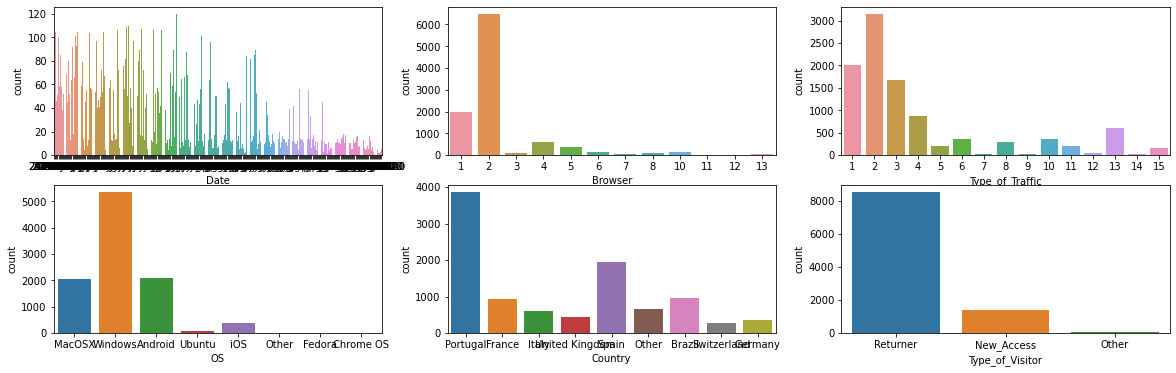

In [9]:
fig, ax =plt.subplots(2,3, figsize=(20, 6))

sns.countplot(data = train, x = 'Date', ax=ax[0][0])

sns.countplot(data = train, x = 'Browser', ax=ax[0][1])

sns.countplot(data = train, x = 'Type_of_Traffic', ax=ax[0][2])

sns.countplot(data = train, x = 'OS', ax=ax[1][0])

sns.countplot(data = train, x = 'Country', ax=ax[1][1])

sns.countplot(data = train, x = 'Type_of_Visitor', ax=ax[1][2])

plt.show()

### Numerical Variables's Histograms

<AxesSubplot:xlabel='GoogleAnalytics_PageValue', ylabel='Count'>

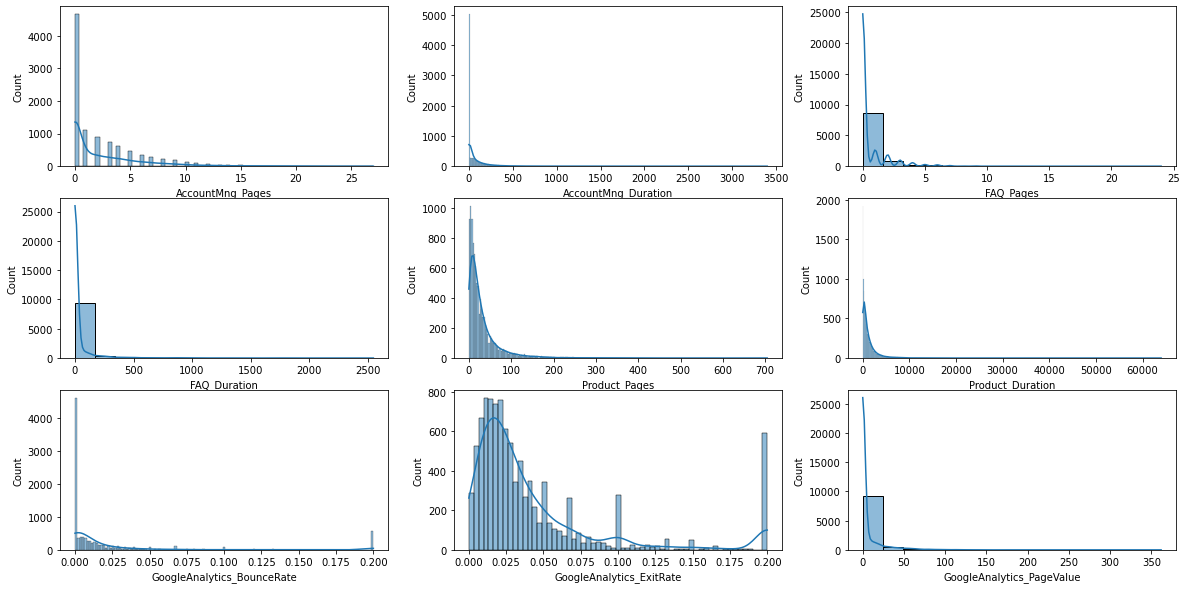

In [10]:
# All the numerical variables have a skewed distribution 

fig, ax =plt.subplots(3,3, figsize=(20, 10))

sns.histplot(data = train, x = 'AccountMng_Pages', ax=ax[0][0],kde=True)

sns.histplot(data = train, x = 'AccountMng_Duration', ax=ax[0][1],kde=True)

sns.histplot(data = train, x = 'FAQ_Pages', ax=ax[0][2],kde=True)

sns.histplot(data = train, x = 'FAQ_Duration', ax=ax[1][0],kde=True)

sns.histplot(data = train, x = 'Product_Pages', ax=ax[1][1],kde=True)

sns.histplot(data = train, x = 'Product_Duration', ax=ax[1][2],kde=True)

sns.histplot(data = train, x = 'GoogleAnalytics_BounceRate', ax=ax[2][0],kde=True)

sns.histplot(data = train, x = 'GoogleAnalytics_ExitRate', ax=ax[2][1],kde=True)

sns.histplot(data = train, x = 'GoogleAnalytics_PageValue', ax=ax[2][2],kde=True)

### Histogram regarding the dependent variable

<AxesSubplot:xlabel='Buy', ylabel='Count'>

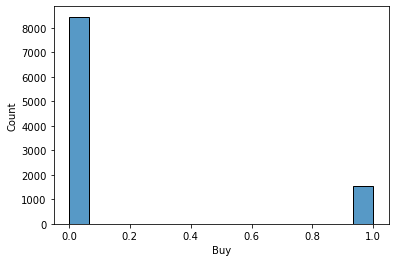

In [11]:
sns.histplot(data = train, x = 'Buy')

**The train dataset is relatively unbalanced**

<a class="anchor" id="TransformVariables">


### 3. Transform Variables 

</a>

In [12]:
### Define the variable `Access_ID` as the new index
test.set_index('Access_ID', inplace = True)
train.set_index('Access_ID', inplace = True)

### Handling Date Variable 

In [13]:
def month_to_number(x):
    month = x.split('-')[1]
    if month == 'Jan':
        return 1
    elif month == 'Feb':
        return 2
    elif month == 'Mar':
        return 3
    elif month == 'Apr':
        return 4
    elif month == 'May':
        return 5
    elif month == 'Jun':
        return 6
    elif month == 'Jul':
        return 7
    elif month == 'Aug':
        return 8
    elif month == 'Sep':
        return 9
    elif month == 'Oct':
        return 10
    elif month == 'Nov':
        return 11
    elif month == 'Dec':
        return 12

In [14]:
def day_to_weekday(x):
    date = x.split('-')
    return datetime(int(date[2]), int(month_to_number(x)), int(date[0]), 12,5,6).weekday()

In [15]:
def day_of_year(x):
    date = x.split('-')
    return datetime(int(date[2]), int(month_to_number(x)), int(date[0]), 12,5,6).timetuple().tm_yday

In [16]:
train['Month'] = train['Date'].apply(lambda x: month_to_number(x))
test['Month'] = test['Date'].apply(lambda x: month_to_number(x))

train['Day'] = train['Date'].apply(lambda x: x.split('-')[0])
test['Day'] = test['Date'].apply(lambda x: x.split('-')[0])

train['Weekday'] = train['Date'].apply(lambda x: day_to_weekday(x))
test['Weekday'] = test['Date'].apply(lambda x: day_to_weekday(x))

train['Yearday'] = train['Date'].apply(lambda x: day_of_year(x)) 
test['Yearday'] = test['Date'].apply(lambda x: day_of_year(x)) 

train = train.drop('Date', axis = 'columns')
test = test.drop('Date', axis = 'columns')
train.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,Month,Day,Weekday,Yearday
Access_ID,,,,,,,,,,,,,,,,,,,
102863333,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0,3,21,5,81
103117814,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0,5,20,2,141
103201891,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0,12,4,4,339


### Weight of the dependent variable in the categorical data

In [17]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

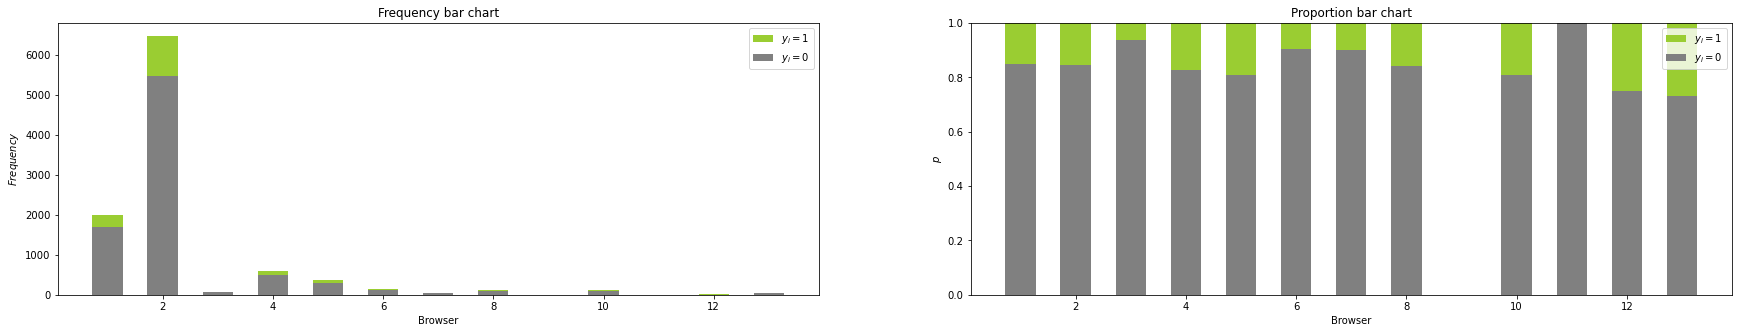

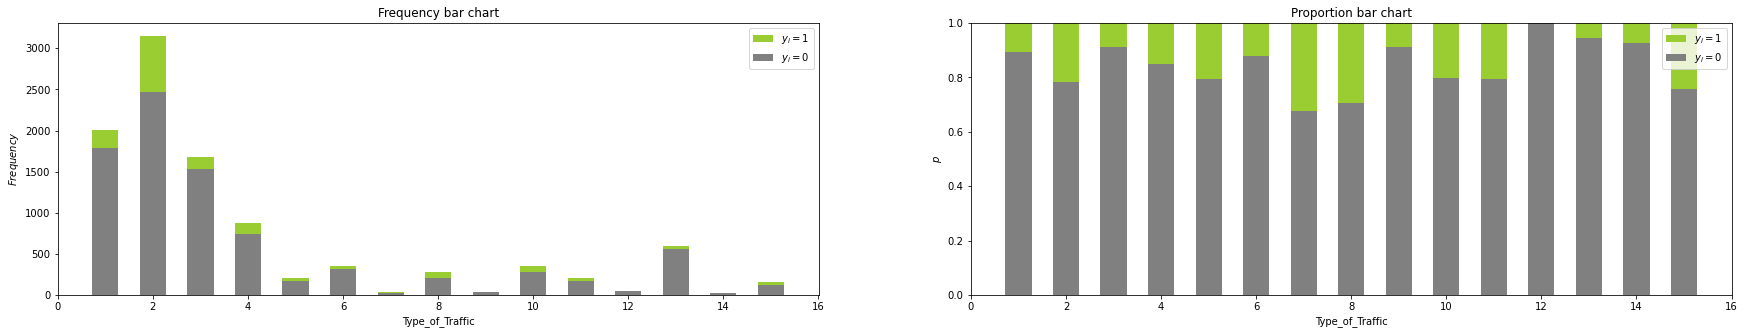

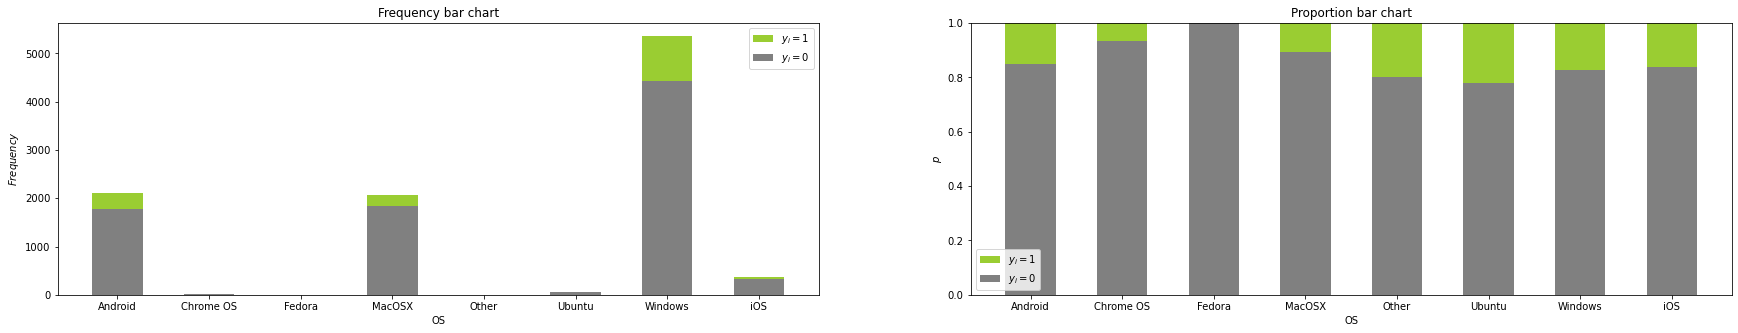

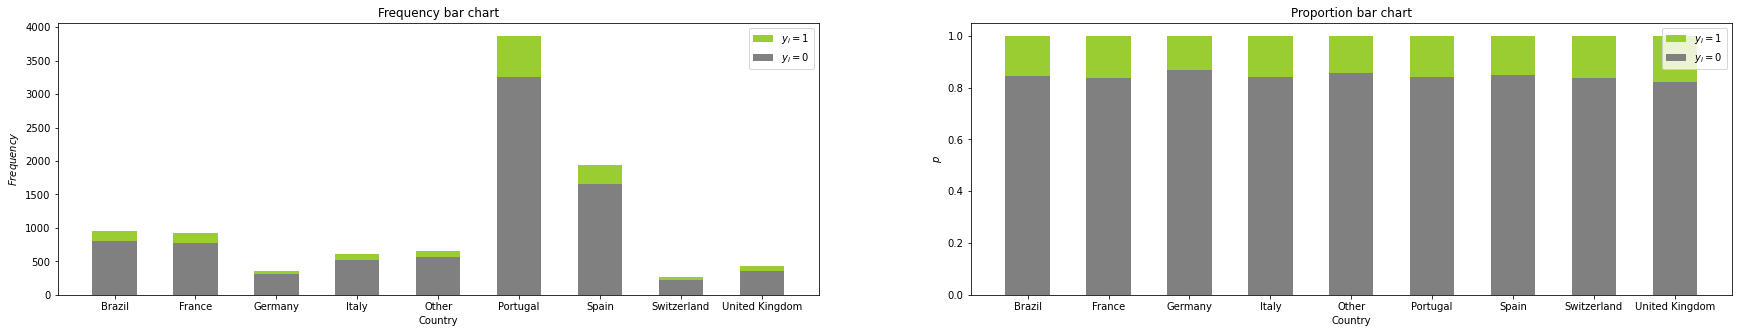

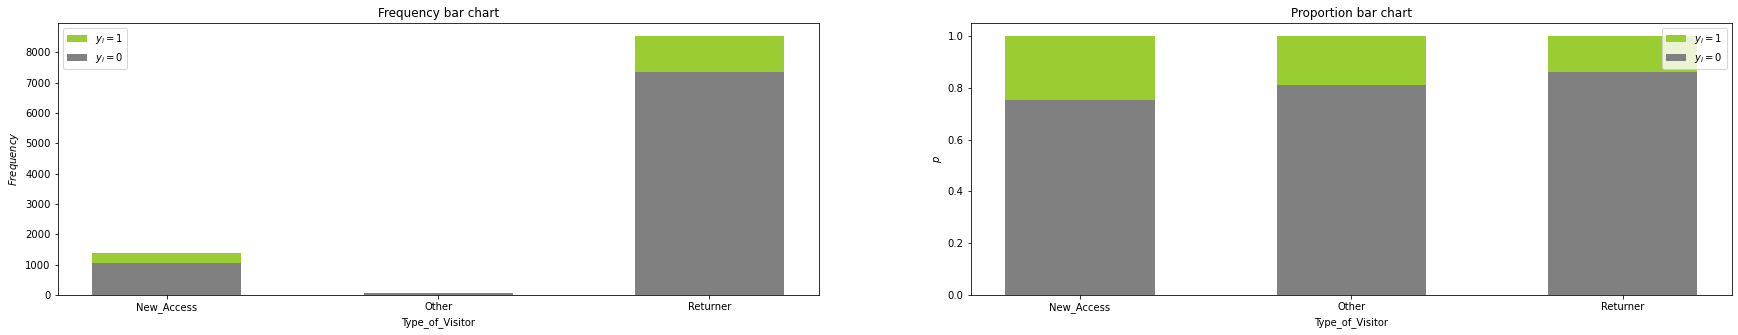

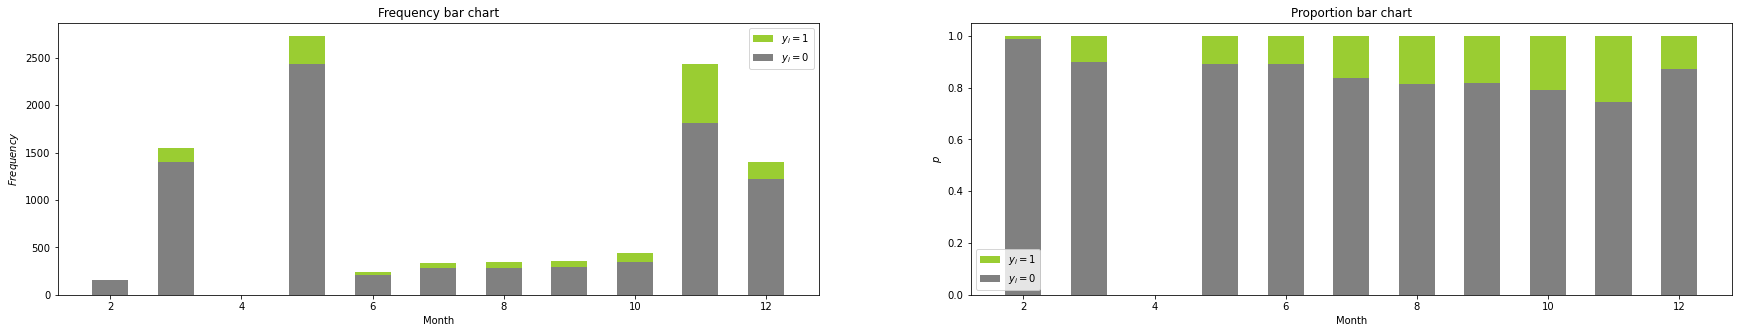

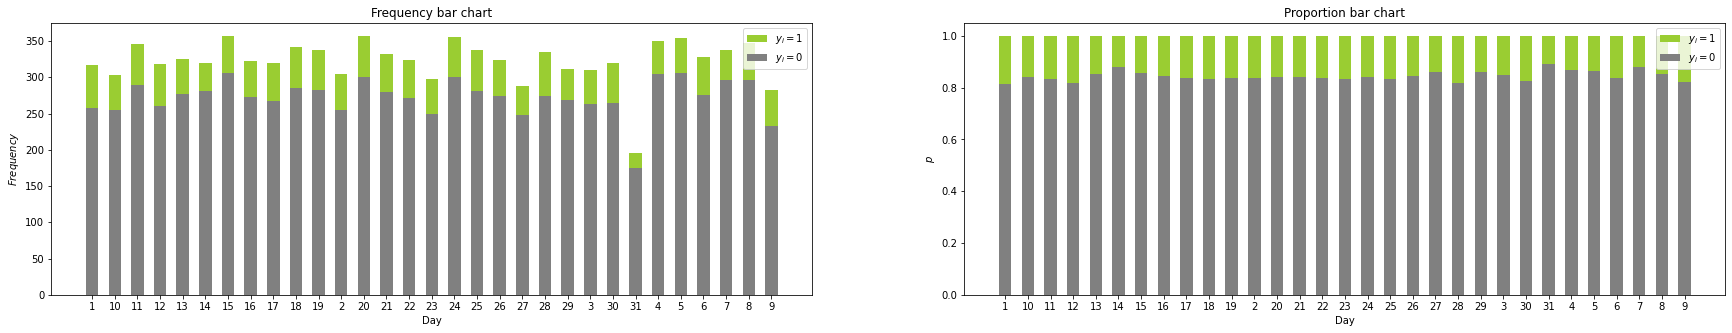

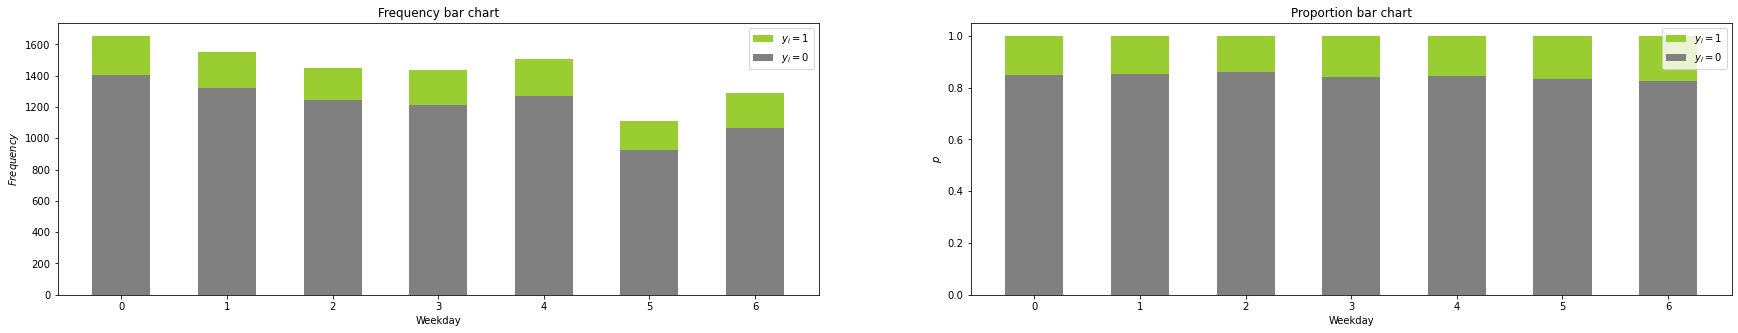

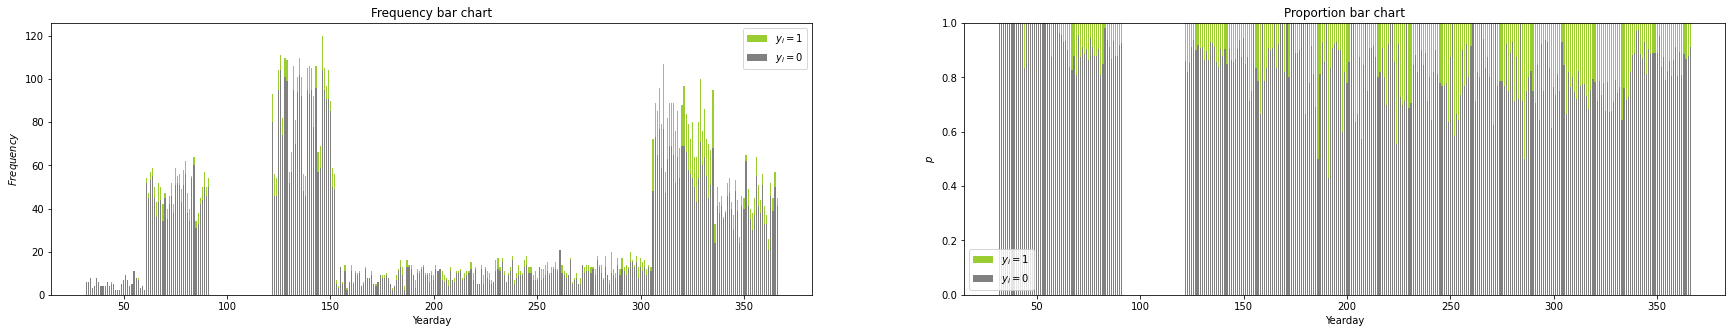

In [18]:
bar_charts_categorical(train, "Browser", "Buy")

bar_charts_categorical(train, "Type_of_Traffic", "Buy")

bar_charts_categorical(train, "OS", "Buy")

bar_charts_categorical(train, "Country", "Buy")

bar_charts_categorical(train, "Type_of_Visitor", "Buy")

bar_charts_categorical(train, "Month", "Buy")

bar_charts_categorical(train, "Day", "Buy")

bar_charts_categorical(train, "Weekday", "Buy")

bar_charts_categorical(train, "Yearday", "Buy")

### Transforming categorical values into numbers

#### One Hot Encoding

In [19]:
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(train[["OS", "Country", "Type_of_Visitor"]])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=train.index, columns=ohc_feat_names) 
ohc_df.head(3)

,x0_Chrome OS,x0_Fedora,x0_MacOSX,x0_Other,x0_Ubuntu,x0_Windows,x0_iOS,x1_France,x1_Germany,x1_Italy,x1_Other,x1_Portugal,x1_Spain,x1_Switzerland,x1_United Kingdom,x2_Other,x2_Returner
Access_ID,,,,,,,,,,,,,,,,,
102863333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
103117814,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
103201891,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
train_n = pd.concat([train.drop(columns = ["OS", "Country", "Type_of_Visitor"]), ohc_df], axis = 1)
train_n.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,...,x1_France,x1_Germany,x1_Italy,x1_Other,x1_Portugal,x1_Spain,x1_Switzerland,x1_United Kingdom,x2_Other,x2_Returner
Access_ID,,,,,,,,,,,,,,,,,,,,,
102863333,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
103117814,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
103201891,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a class="anchor" id="CoherenceChecking">


### 4. Coherence Checking

</a>

In [21]:
target = train_n['Buy']
inputs = train_n.drop('Buy', axis = 'columns')

In [22]:
# Explanation of the variables 

# GoogleAnalytics_BounceRate - bounce equals to one is enter in only on page of the website (home page or other) 
# and exits the site immediately. For our type of business, we want a low bounce rate. 

# GoogleAnalytics_ExitRate - total exits from page/total visits to page  

# GoogleAnalytics_PageValue - is the average value for a page that a user visited before landing on the goal page or 
# completing an Ecommerce Page.

In [23]:
# 1st Check AccountMng_Pages vs. AccountMng_Duration

print(len(inputs[(inputs.AccountMng_Pages>=2) & (inputs.AccountMng_Duration==0)]))
print(len(inputs[(inputs.AccountMng_Pages==0) & (inputs.AccountMng_Duration>0)]))
print(end="\n")

# 2nd Check FAQ_Pages vs. FAQ_Duration
print(len(inputs[(inputs.FAQ_Pages>=2) & (inputs.FAQ_Duration==0)]))
print(len(inputs[(inputs.FAQ_Pages==0) & (inputs.FAQ_Duration>0)]))
print(end="\n")

# 3rd Check Product_Pages vs. Product_Duration
print(len(inputs[(inputs.Product_Pages>=2) & (inputs.Product_Duration==0)]))
print(len(inputs[(inputs.Product_Pages==0) & (inputs.Product_Duration>0)]))

3
0

9
0

47
0


In [24]:
# Modify the AccountMng, FAQ and Product duration variables when its value is zero with the respective pages equals or above 2

for i in range(2,27):
    index1=inputs[(inputs.AccountMng_Pages==i) & (inputs.AccountMng_Duration==0)].index
    AccountMng_Duration_median=inputs[inputs.AccountMng_Pages==i]["AccountMng_Duration"].median() 
    inputs.loc[index1,"AccountMng_Duration"]=AccountMng_Duration_median

for i in range(2,27):
    index2=inputs[(inputs.FAQ_Pages==i) & (inputs.FAQ_Duration==0)].index
    FAQ_Duration_median=inputs[inputs.FAQ_Pages==i]["FAQ_Duration"].median() 
    inputs.loc[index2,"FAQ_Duration"]=FAQ_Duration_median

for i in range(2,27):
    index3=inputs[(inputs.Product_Pages==i) & (inputs.Product_Duration==0)].index
    Product_Duration_median=inputs[inputs.Product_Pages==i]["Product_Duration"].median() 
    inputs.loc[index3,"Product_Duration"]=Product_Duration_median



<a class="anchor" id="TrainTestSplit">


### 5. Train Test Split

</a>

In [25]:
X_train, X_val, y_train, y_val = train_test_split(inputs, target, test_size = 0.20, random_state = 0, stratify = target, shuffle = True)

In [26]:
metric_features=['AccountMng_Pages','AccountMng_Duration','FAQ_Pages','FAQ_Duration','Product_Pages','Product_Duration','GoogleAnalytics_BounceRate','GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue']
non_metric=X_train.drop(columns=metric_features).columns

X_train_num = X_train[metric_features]
X_train_cat = X_train[non_metric]

X_val_num = X_val[metric_features]
X_val_cat = X_val[non_metric]

<a class="anchor" id="OutlierTreatment">


### 6. Outlier Treatment 
    
</a>

### Numerical Train Variables's Histograms

<AxesSubplot:xlabel='GoogleAnalytics_PageValue', ylabel='Count'>

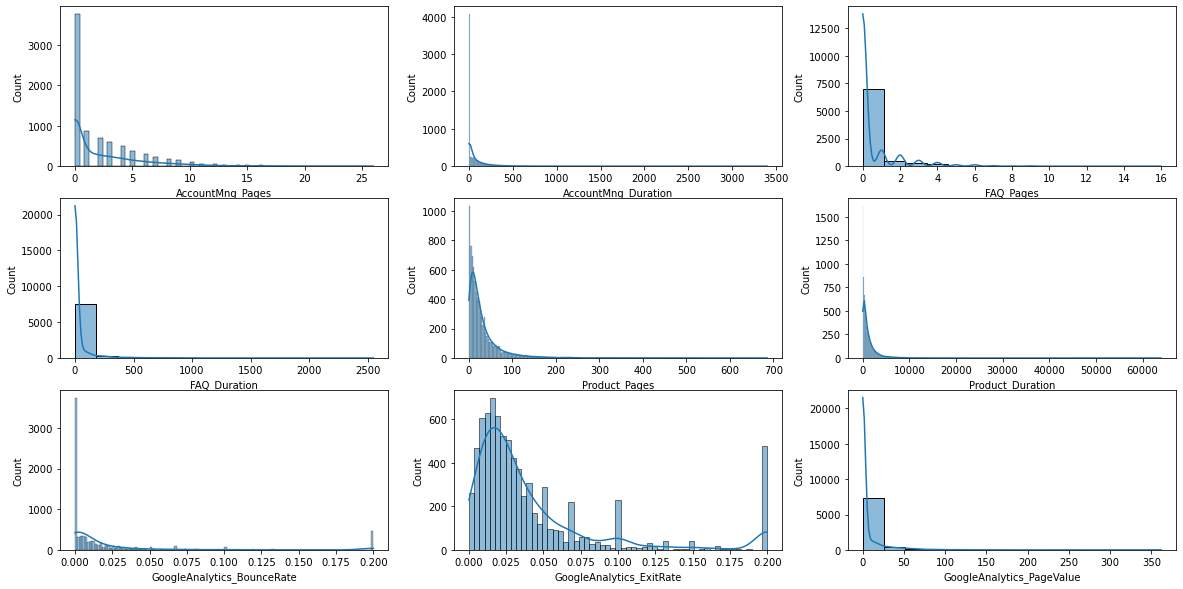

In [27]:
# All the numerical variables have a skewed distribution 

fig, ax =plt.subplots(3,3, figsize=(20, 10))

sns.histplot(data = X_train_num, x = 'AccountMng_Pages', ax=ax[0][0],kde=True)

sns.histplot(data = X_train_num, x = 'AccountMng_Duration', ax=ax[0][1],kde=True)

sns.histplot(data = X_train_num, x = 'FAQ_Pages', ax=ax[0][2],kde=True)

sns.histplot(data = X_train_num, x = 'FAQ_Duration', ax=ax[1][0],kde=True)

sns.histplot(data = X_train_num, x = 'Product_Pages', ax=ax[1][1],kde=True)

sns.histplot(data = X_train_num, x = 'Product_Duration', ax=ax[1][2],kde=True)

sns.histplot(data = X_train_num, x = 'GoogleAnalytics_BounceRate', ax=ax[2][0],kde=True)

sns.histplot(data = X_train_num, x = 'GoogleAnalytics_ExitRate', ax=ax[2][1],kde=True)

sns.histplot(data = X_train_num, x = 'GoogleAnalytics_PageValue', ax=ax[2][2],kde=True)

### Numerical Train Variables's Cumulative Distribution Function

<AxesSubplot:xlabel='GoogleAnalytics_PageValue', ylabel='Proportion'>

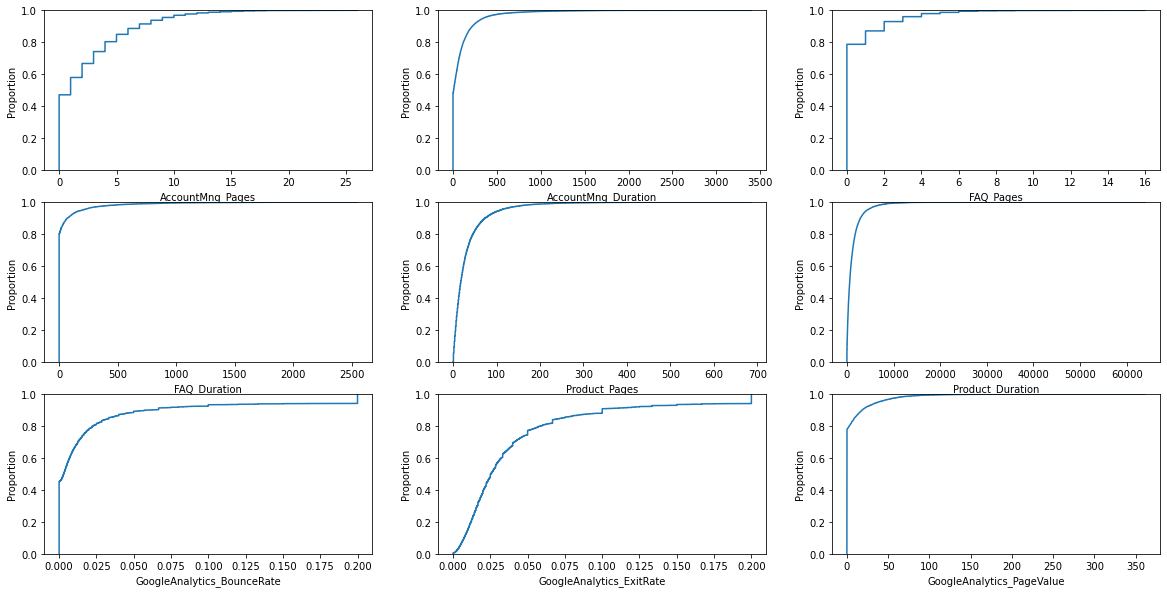

In [28]:
# All the numerical variables have a skewed distribution 

fig, ax =plt.subplots(3,3, figsize=(20, 10))

sns.ecdfplot(data = X_train_num, x = 'AccountMng_Pages', ax=ax[0][0])

sns.ecdfplot(data = X_train_num, x = 'AccountMng_Duration', ax=ax[0][1])

sns.ecdfplot(data = X_train_num, x = 'FAQ_Pages', ax=ax[0][2])

sns.ecdfplot(data = X_train_num, x = 'FAQ_Duration', ax=ax[1][0])

sns.ecdfplot(data = X_train_num, x = 'Product_Pages', ax=ax[1][1])

sns.ecdfplot(data = X_train_num, x = 'Product_Duration', ax=ax[1][2])

sns.ecdfplot(data = X_train_num, x = 'GoogleAnalytics_BounceRate', ax=ax[2][0])

sns.ecdfplot(data = X_train_num, x = 'GoogleAnalytics_ExitRate', ax=ax[2][1])

sns.ecdfplot(data = X_train_num, x = 'GoogleAnalytics_PageValue', ax=ax[2][2])

### Numerical Train Variables's Boxplots

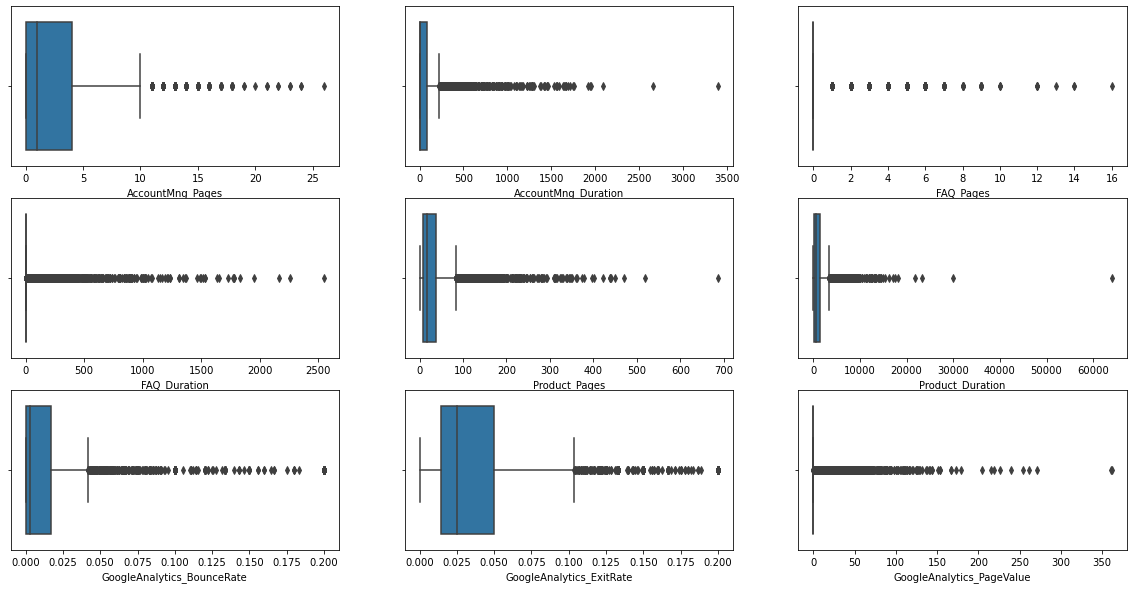

In [29]:
fig, ax =plt.subplots(3,3, figsize=(20, 10))
sns.boxplot(data = X_train_num, x = 'AccountMng_Pages', ax=ax[0][0])

sns.boxplot(data = X_train_num, x = 'AccountMng_Duration', ax=ax[0][1])

sns.boxplot(data = X_train_num, x = 'FAQ_Pages', ax=ax[0][2])

sns.boxplot(data = X_train_num, x = 'FAQ_Duration', ax=ax[1][0])

sns.boxplot(data = X_train_num, x = 'Product_Pages', ax=ax[1][1])

sns.boxplot(data = X_train_num, x = 'Product_Duration', ax=ax[1][2])

sns.boxplot(data = X_train_num, x = 'GoogleAnalytics_BounceRate', ax=ax[2][0])

sns.boxplot(data = X_train_num, x = 'GoogleAnalytics_ExitRate', ax=ax[2][1])

sns.boxplot(data = X_train_num, x = 'GoogleAnalytics_PageValue', ax=ax[2][2])
plt.show()

## Pairwise Relationship of Numerical Train Variables

Text(0.5, 0.98, 'Pairwise Relationship of Numerical Variables')

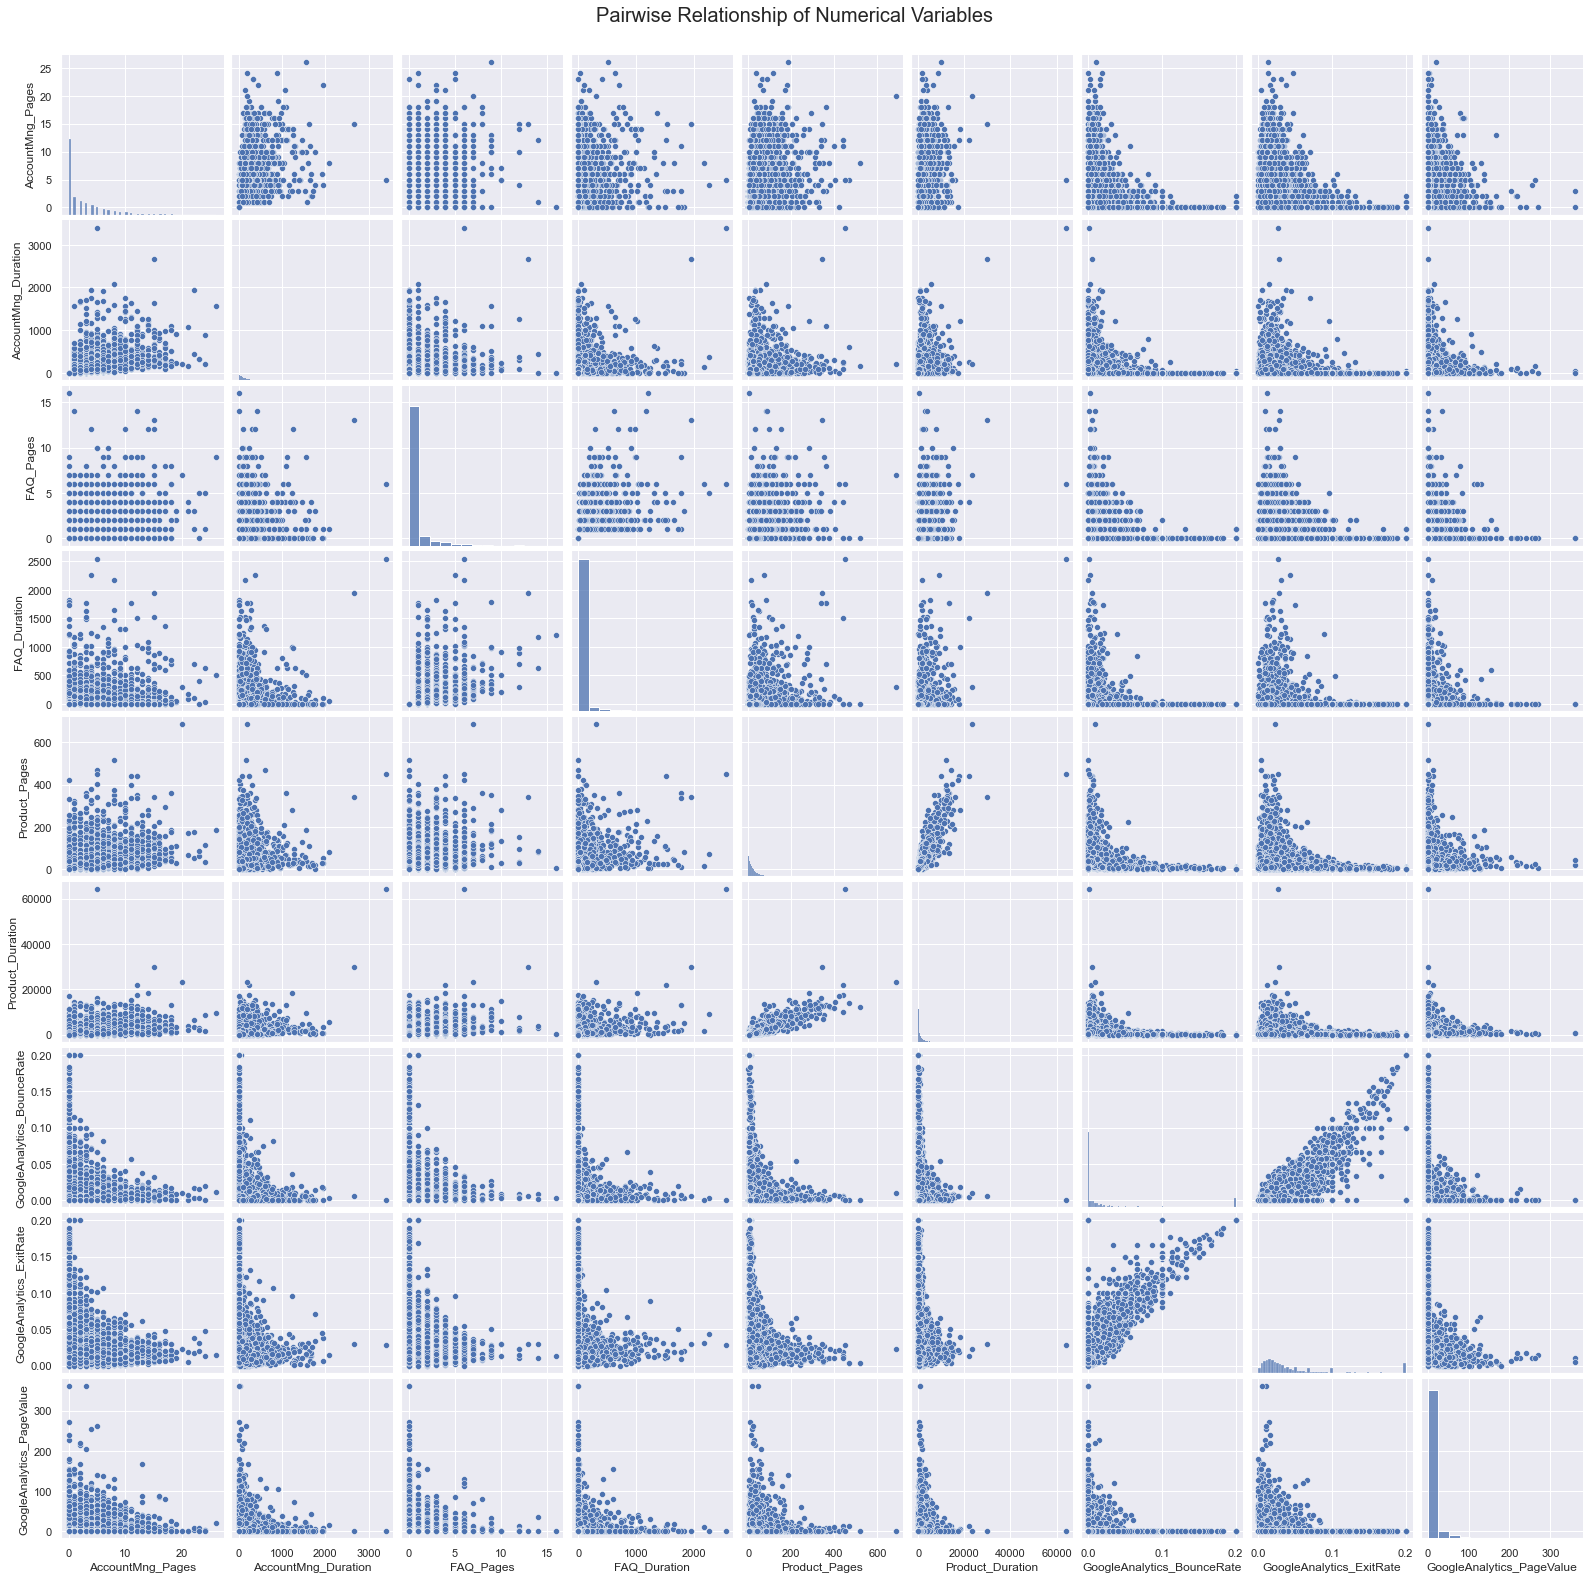

In [30]:
metric_features=['AccountMng_Pages','AccountMng_Duration','FAQ_Pages','FAQ_Duration','Product_Pages','Product_Duration','GoogleAnalytics_BounceRate','GoogleAnalytics_ExitRate','GoogleAnalytics_PageValue']

sns.set()

# Setting pairplot
sns.pairplot(X_train_num[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

<a class="anchor" id="ZScore">


### 6.1 Z-Score 

</a>

In [31]:
# Outlier treatment!

# AccountMng_Pages, AccountMng_Duration, FAQ_Pages, 
# FAQ_Duration, Product_Pages, Product_Duration, 
# GoogleAnalytics_BounceRate, GoogleAnalytics_ExitRate, GoogleAnalytics_PageValue

def outlier_treatment(inputs):
    Z_SCORE_ANOMALY_VAL = 3

    z_score_mng_pages = list(stats.zscore(inputs['AccountMng_Pages']))
    z_score_mng_duration = list(stats.zscore(inputs['AccountMng_Duration']))
    z_score_faq_pages = list(stats.zscore(inputs['FAQ_Pages']))
    z_score_faq_duration = list(stats.zscore(inputs['FAQ_Duration']))
    z_score_product_pages = list(stats.zscore(inputs['Product_Pages']))
    z_score_product_duration = list(stats.zscore(inputs['Product_Duration']))
    z_score_analytics_bouncerate = list(stats.zscore(inputs['GoogleAnalytics_BounceRate']))
    z_score_analytics_exitrate = list(stats.zscore(inputs['GoogleAnalytics_ExitRate']))
    z_score_analytics_pagevalue = list(stats.zscore(inputs['GoogleAnalytics_PageValue']))

    new_input = inputs
    for i in range(len(inputs)):
        if abs(z_score_mng_pages[i]) >= Z_SCORE_ANOMALY_VAL:
            new_input = new_input.drop(inputs.index[i])
        elif abs(z_score_mng_duration[i]) >= Z_SCORE_ANOMALY_VAL:
            new_input = new_input.drop(inputs.index[i])
        elif abs(z_score_faq_pages[i]) >= Z_SCORE_ANOMALY_VAL:
            new_input = new_input.drop(inputs.index[i])
        elif abs(z_score_faq_duration[i]) >= Z_SCORE_ANOMALY_VAL:
            new_input = new_input.drop(inputs.index[i])
        elif abs(z_score_product_pages[i]) >= Z_SCORE_ANOMALY_VAL:
            new_input = new_input.drop(inputs.index[i])
        elif abs(z_score_product_duration[i]) >= Z_SCORE_ANOMALY_VAL:
            new_input = new_input.drop(inputs.index[i])
        elif abs(z_score_analytics_bouncerate[i]) >= Z_SCORE_ANOMALY_VAL:
            new_input = new_input.drop(inputs.index[i])
        elif abs(z_score_analytics_exitrate[i]) >= Z_SCORE_ANOMALY_VAL:
            new_input = new_input.drop(inputs.index[i])
        elif abs(z_score_analytics_pagevalue[i]) >= Z_SCORE_ANOMALY_VAL:
            new_input = new_input.drop(inputs.index[i])
    inputs = new_input
    return inputs

#train = outlier_treatment(train)

In [32]:
train_z_score=X_train_num.copy()
train_z_score=outlier_treatment(train_z_score)
print('Percentage of data removed by Z-score: ', np.round((1-train_z_score.shape[0]/X_train_num.shape[0])*100,2),"\n" + "Total values removed: ",
                    X_train_num.shape[0]-train_z_score.shape[0])

Percentage of data removed by Z-score:  15.51 
Total values removed:  1241


<a class="anchor" id="IQR">


### 6.2 IQR method  

</a>

In [33]:
df_iqr=X_train_num.copy()

In [34]:
q25 = df_iqr.quantile(.25)
q75 = df_iqr.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    #print(llim)
    ulim = upper_lim[metric]
    #print(ulim)
    filters.append(df_iqr[metric].between(llim, ulim, inclusive=True))
    
    
#for i,j in enumerate(metric_features):
    #print('Percentage of data removed by IQR method for the variable: ' + str(j),  np.round((df_iqr.shape[0]- filters[i].sum())/ df_iqr.shape[0]*100, 4)) 
        
        
df_iqr = df_iqr[np.all(filters, 0)]

print('Percentage of data removed by IQR:', np.round((1-df_iqr.shape[0]/X_train_num.shape[0])*100, 2), "\n" + "Total values removed: ",
     X_train_num.shape[0]-df_iqr.shape[0])

Percentage of data removed by IQR: 52.34 
Total values removed:  4187


<a class="anchor" id="FilterManual">


### 6.3 Filter - Manual 

</a>

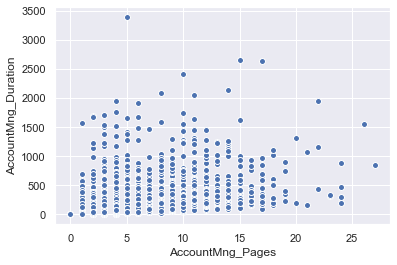

In [35]:
# Single Metric Variable Scatter plot
plt.scatter(train["AccountMng_Pages"], train["AccountMng_Duration"], edgecolors="white")
plt.xlabel("AccountMng_Pages")
plt.ylabel("AccountMng_Duration")

plt.show()

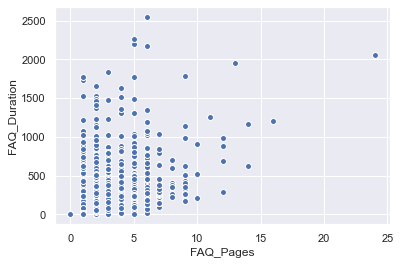

In [356]:
# Single Metric Variable Scatter plot
plt.scatter(train["FAQ_Pages"], train["FAQ_Duration"], edgecolors="white")
plt.xlabel("FAQ_Pages")
plt.ylabel("FAQ_Duration")

plt.show()

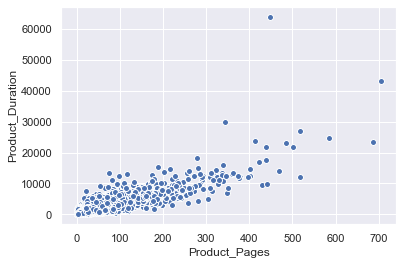

In [355]:
# Single Metric Variable Scatter plot
plt.scatter(train["Product_Pages"], train["Product_Duration"], edgecolors="white")
plt.xlabel("Product_Pages")
plt.ylabel("Product_Duration")

plt.show()

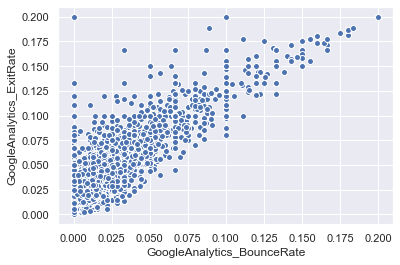

In [37]:
# Single Metric Variable Scatter plot
plt.scatter(train["GoogleAnalytics_BounceRate"], train["GoogleAnalytics_ExitRate"], edgecolors="white")
plt.xlabel("GoogleAnalytics_BounceRate")
plt.ylabel("GoogleAnalytics_ExitRate")

plt.show()

In [38]:
filters_1 = (X_train_num['AccountMng_Duration'] > 2000) | (X_train_num['AccountMng_Pages']>20)
print('Percentage of outliers removed with filters_1:', np.round(filters_1.sum()/X_train_num.shape[0]*100,4))

filters_2 = (X_train_num['FAQ_Duration'] > 1500) | (X_train_num['FAQ_Pages']>15)
print('Percentage of outliers removed with filters_2:', np.round(filters_2.sum()/X_train_num.shape[0]*100,4))

filters_3 = (X_train_num['Product_Duration'] > 25000) | (X_train_num['Product_Pages']>400)
print('Percentage of outliers removed with filters_3:', np.round(filters_3.sum()/X_train_num.shape[0]*100,4))

filters_4 = (X_train_num.GoogleAnalytics_PageValue>150)
print('Percentage of outliers removed with filters_4:', np.round(filters_4.sum()/X_train_num.shape[0]*100,4))

filters_5 = (X_train_num.GoogleAnalytics_BounceRate>0.190)
print('Percentage of outliers removed with filters_5:', np.round(filters_5.sum()/X_train_num.shape[0]*100,4))

filters_6 = (X_train_num.GoogleAnalytics_ExitRate>0.190)
print('Percentage of outliers removed with filters_6:', np.round(filters_6.sum()/X_train_num.shape[0]*100,4))


Percentage of outliers removed with filters_1: 0.15
Percentage of outliers removed with filters_2: 0.1875
Percentage of outliers removed with filters_3: 0.125
Percentage of outliers removed with filters_4: 0.2125
Percentage of outliers removed with filters_5: 5.8882
Percentage of outliers removed with filters_6: 5.9757


**Notes**

- outliers removed based on the boxplot and pairplopts visualization

- filters_5 and filters_6 are not applied because would lead to a significantly reduction on the dataset

In [39]:
X_train_num=X_train_num[~(filters_1|filters_2|filters_3|filters_4)]

In [40]:
# Change y_train, and X_train_cat to the same size of X_train_num
index_kept=X_train_num.index
y_train=y_train[index_kept]
X_train_cat=X_train_cat.loc[index_kept,:]

<a class="anchor" id="TranformVariablesII">


### 7. Tranform Variables II

</a>

In [41]:
metric_features_yeojohnson=[]


for i in metric_features:
    metric_features_yeojohnson.append(i + str("_yeojohnson"))

auxiliar=dict(zip(metric_features,metric_features_yeojohnson)) 

for j,s in auxiliar.items():
    X_train_num[s], param =stats.yeojohnson(X_train_num[j])
    X_val_num[s], param =stats.yeojohnson(X_val_num[j])

X_train_num.head() 

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,AccountMng_Pages_yeojohnson,AccountMng_Duration_yeojohnson,FAQ_Pages_yeojohnson,FAQ_Duration_yeojohnson,Product_Pages_yeojohnson,Product_Duration_yeojohnson,GoogleAnalytics_BounceRate_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson
Access_ID,,,,,,,,,,,,,,,,,,
424851631,7,86.2778,2,21.0,80,2170.2867,0.0036,0.0215,25.7660,1.264373,3.506849,0.252951,0.862034,4.744285,21.032418,0.003368,0.017058,0.665747
469670817,2,168.4000,0,0.0,10,208.0000,0.0000,0.0083,0.0000,0.834430,3.891929,-0.000000,-0.000000,2.499654,10.485101,-0.000000,0.007570,-0.000000
732800945,0,0.0000,0,0.0,8,143.2500,0.0000,0.0500,0.0000,-0.000000,-0.000000,-0.000000,-0.000000,2.282465,9.274992,-0.000000,0.030168,-0.000000
528244379,4,34.0000,0,0.0,46,627.3083,0.0000,0.0042,0.0000,1.085776,2.926571,-0.000000,-0.000000,4.116977,14.747565,-0.000000,0.004007,-0.000000
785514467,0,0.0000,0,0.0,12,337.0000,0.0000,0.0067,19.3701,-0.000000,-0.000000,-0.000000,-0.000000,2.681607,12.215211,-0.000000,0.006219,0.663240


<AxesSubplot:xlabel='GoogleAnalytics_PageValue_yeojohnson', ylabel='Count'>

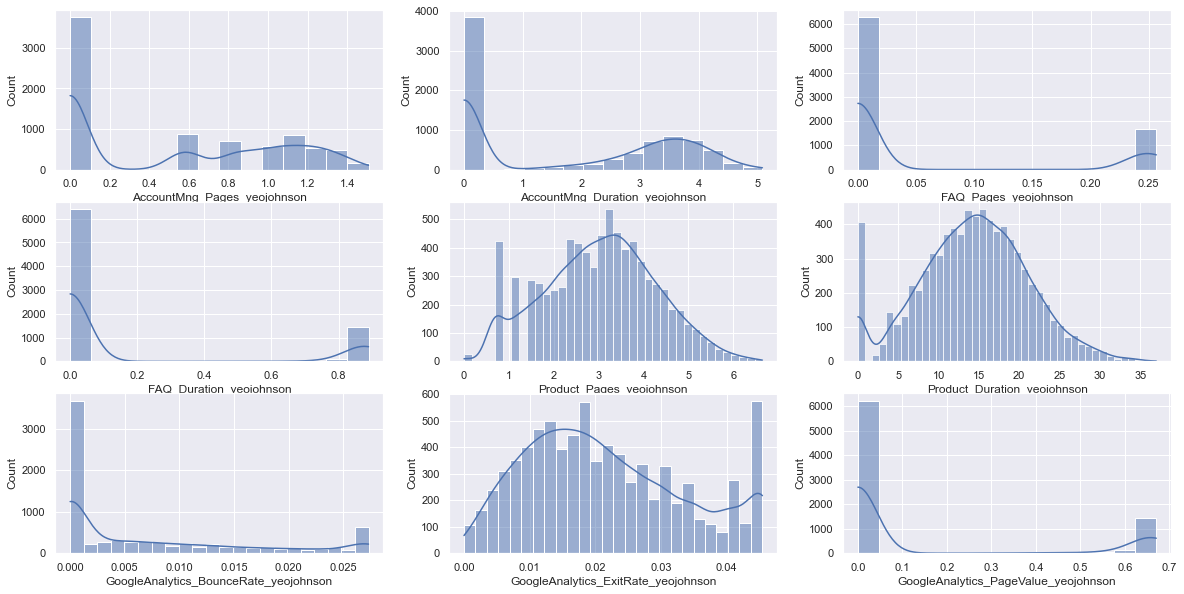

In [42]:
# All the numerical variables have a skewed distribution 

fig, ax =plt.subplots(3,3, figsize=(20, 10))

sns.histplot(data = X_train_num, x = 'AccountMng_Pages_yeojohnson', ax=ax[0][0],kde=True)

sns.histplot(data = X_train_num, x = 'AccountMng_Duration_yeojohnson', ax=ax[0][1],kde=True)

sns.histplot(data = X_train_num, x = 'FAQ_Pages_yeojohnson', ax=ax[0][2],kde=True)

sns.histplot(data = X_train_num, x = 'FAQ_Duration_yeojohnson', ax=ax[1][0],kde=True)

sns.histplot(data = X_train_num, x = 'Product_Pages_yeojohnson', ax=ax[1][1],kde=True)

sns.histplot(data = X_train_num, x = 'Product_Duration_yeojohnson', ax=ax[1][2],kde=True)

sns.histplot(data = X_train_num, x = 'GoogleAnalytics_BounceRate_yeojohnson', ax=ax[2][0],kde=True)

sns.histplot(data = X_train_num, x = 'GoogleAnalytics_ExitRate_yeojohnson', ax=ax[2][1],kde=True)

sns.histplot(data = X_train_num, x = 'GoogleAnalytics_PageValue_yeojohnson', ax=ax[2][2],kde=True)

<a class="anchor" id="Standardization">


### 8. Standardization

</a>

<a class="anchor" id="MinMaxScaler">


### 8.1 MinMax Scaler

</a>

In [43]:
# Used standardization instead of 

scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train_num.index)
X_train_num_scaled.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,AccountMng_Pages_yeojohnson,AccountMng_Duration_yeojohnson,FAQ_Pages_yeojohnson,FAQ_Duration_yeojohnson,Product_Pages_yeojohnson,Product_Duration_yeojohnson,GoogleAnalytics_BounceRate_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson
Access_ID,,,,,,,,,,,,,,,,,,
424851631,0.368421,0.044336,0.142857,0.014052,0.201511,0.119432,0.018,0.1075,0.178443,0.838496,0.689692,0.986228,0.96929,0.713640,0.568861,0.123249,0.375499,0.993152
469670817,0.105263,0.086536,0.000000,0.000000,0.025189,0.011446,0.000,0.0415,0.000000,0.553370,0.765426,0.000000,0.00000,0.376000,0.283589,0.000000,0.166650,0.000000
732800945,0.000000,0.000000,0.000000,0.000000,0.020151,0.007883,0.000,0.2500,0.000000,0.000000,0.000000,0.000000,0.00000,0.343331,0.250860,0.000000,0.664105,0.000000


In [44]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,AccountMng_Pages_yeojohnson,AccountMng_Duration_yeojohnson,FAQ_Pages_yeojohnson,FAQ_Duration_yeojohnson,Product_Pages_yeojohnson,Product_Duration_yeojohnson,GoogleAnalytics_BounceRate_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson
Access_ID,,,,,,,,,,,,,,,,,,
545795498,0.0,0.0,0.0,0.0,0.007557,0.003324,0.3335,0.6665,0.0,0.0,0.0,0.0,0.0,0.209645,0.178060,0.913830,0.943721,0.0
315196890,0.0,0.0,0.0,0.0,0.125945,0.140302,0.0610,0.1825,0.0,0.0,0.0,0.0,0.0,0.600480,0.546908,0.359264,0.547581,0.0
469020824,0.0,0.0,0.0,0.0,0.015113,0.005118,0.3335,0.4165,0.0,0.0,0.0,0.0,0.0,0.294911,0.206988,0.913830,0.833253,0.0


<a class="anchor" id="Featureselection">


### 9. Feature selection with Filter , Embedded and Wrapper methods

</a>

### Filter Methods

<a class="anchor" id="SpearmanCorrelation">


### 9.1 Spearman Correlation

</a>

In [212]:
all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,AccountMng_Pages_yeojohnson,AccountMng_Duration_yeojohnson,FAQ_Pages_yeojohnson,FAQ_Duration_yeojohnson,Product_Pages_yeojohnson,Product_Duration_yeojohnson,GoogleAnalytics_BounceRate_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Buy
Access_ID,,,,,,,,,,,,,,,,,,,
424851631,0.368421,0.044336,0.142857,0.014052,0.201511,0.119432,0.018,0.1075,0.178443,0.838496,0.689692,0.986228,0.96929,0.713640,0.568861,0.123249,0.375499,0.993152,1
469670817,0.105263,0.086536,0.000000,0.000000,0.025189,0.011446,0.000,0.0415,0.000000,0.553370,0.765426,0.000000,0.00000,0.376000,0.283589,0.000000,0.166650,0.000000,0
732800945,0.000000,0.000000,0.000000,0.000000,0.020151,0.007883,0.000,0.2500,0.000000,0.000000,0.000000,0.000000,0.00000,0.343331,0.250860,0.000000,0.664105,0.000000,0


In [213]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

cor_spearman = all_train_num.corr(method ='spearman')

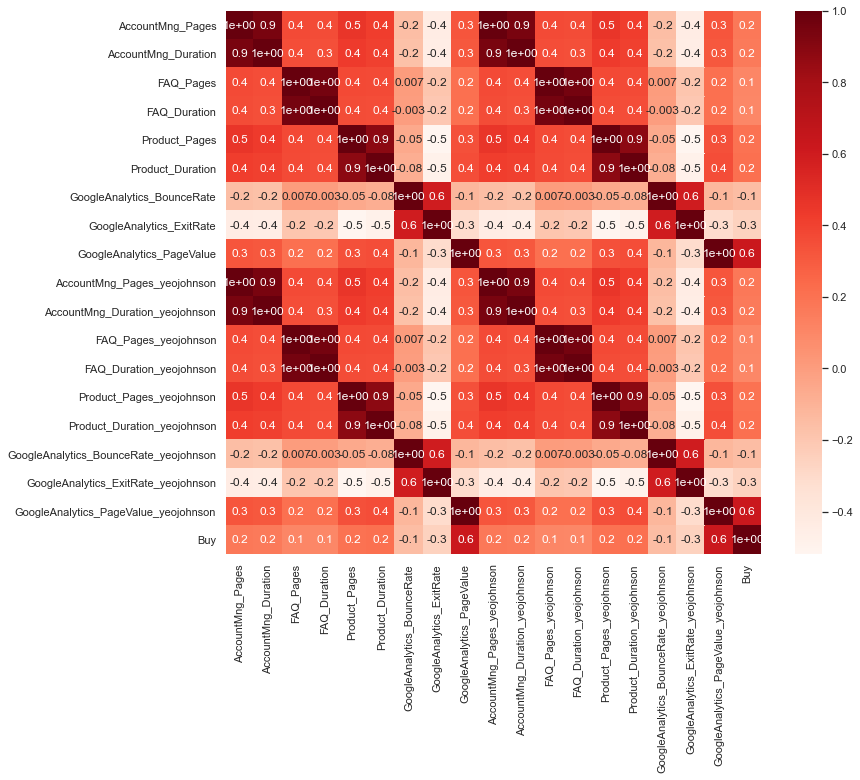

In [48]:
cor_heatmap(cor_spearman)

We can conclude that:
- There is no independent variable highly correlated with the target. We need to use other feature selection techniques to get more insights.
- There are three pairs of variables highly correlated:
    - AccountMng_Pages vs AccountMng_Duration (0.9) <br>
    - FAQ_Pages vs FAQ_Duration	(1.0) <br>
    - Product_Pages vs Product_Duration (0.9) <br>

<a class="anchor" id="ChiSquare">


### 9.2 Chi-Square for categorical data

</a>

In [49]:
# O algoritmo debaixo usa sscipy.stats.chi2_contingency from scipy. Este dá os resultados corretos!!! 

In [50]:
pvalue=[]

def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    pvalue.append(p)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [51]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Browser is IMPORTANT for Prediction
Type_of_Traffic is IMPORTANT for Prediction
Month is IMPORTANT for Prediction
Day is NOT an important predictor. (Discard Day from model)
Weekday is NOT an important predictor. (Discard Weekday from model)
Yearday is IMPORTANT for Prediction
x0_Chrome OS is NOT an important predictor. (Discard x0_Chrome OS from model)
x0_Fedora is NOT an important predictor. (Discard x0_Fedora from model)
x0_MacOSX is IMPORTANT for Prediction
x0_Other is NOT an important predictor. (Discard x0_Other from model)
x0_Ubuntu is NOT an important predictor. (Discard x0_Ubuntu from model)
x0_Windows is IMPORTANT for Prediction
x0_iOS is NOT an important predictor. (Discard x0_iOS from model)
x1_France is NOT an important predictor. (Discard x1_France from model)
x1_Germany is IMPORTANT for Prediction
x1_Italy is NOT an important predictor. (Discard x1_Italy from model)
x1_Other is NOT an important predictor. (Discard x1_Other from model)
x1_Portugal is NOT an important pred

<a class="anchor" id="MutualInformation">


### 9.3 Mutual Information

</a>

In [52]:
# If do not define the random_state, the results are different. That's strange. 

threshold = 6  # the number of most relevant features. Number picked based on the chi-square output. 
mi = mutual_info_classif(X_train_cat, y_train,random_state=0)

high_score_features = []
for score, variable_name in sorted(zip(mi, X_train_cat.columns), reverse=True)[:threshold]:
        print(variable_name, round(score,4))
        high_score_features.append(variable_name)

Yearday 0.0164
Month 0.0161
Type_of_Traffic 0.0153
x2_Other 0.0069
x2_Returner 0.0066
x0_MacOSX 0.0057


Text(0, 0.5, 'Mutual Information')

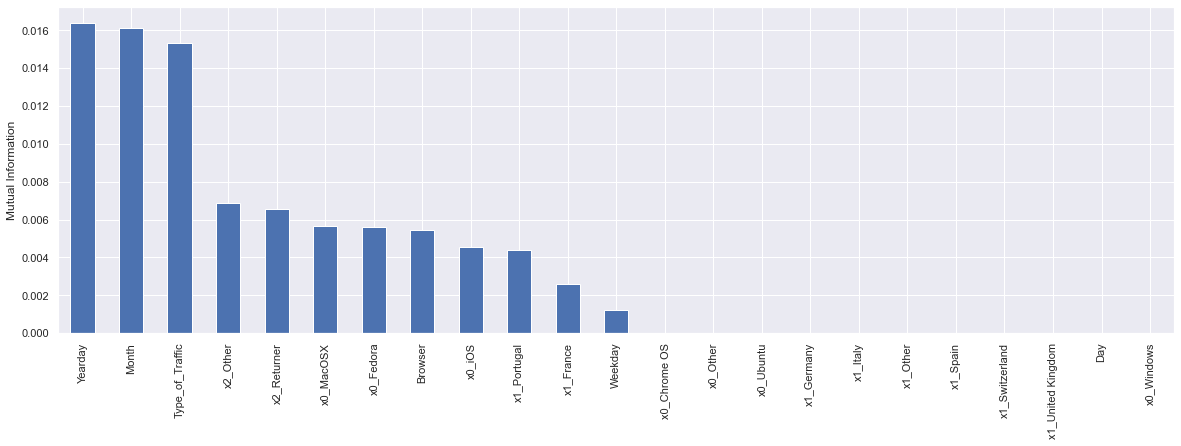

In [53]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train_cat.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

### Wrapper methods

<a class="anchor" id="RFE">


### 9.4 RFE

</a>

In [54]:
model_LR = LogisticRegression()

In [55]:
# Deciding the nº of features to select in rfe

#no of features
nof_list=np.arange(1,20)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(estimator = model, n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.890000


In [56]:
rfe = RFE(estimator = model_LR, n_features_to_select = 11)
X_rfe = rfe.fit_transform(X_train_num_scaled, y_train)
X_train_num_scaled.columns

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
       'AccountMng_Pages_yeojohnson', 'AccountMng_Duration_yeojohnson',
       'FAQ_Pages_yeojohnson', 'FAQ_Duration_yeojohnson',
       'Product_Pages_yeojohnson', 'Product_Duration_yeojohnson',
       'GoogleAnalytics_BounceRate_yeojohnson',
       'GoogleAnalytics_ExitRate_yeojohnson',
       'GoogleAnalytics_PageValue_yeojohnson'],
      dtype='object')

In [57]:
rfe.support_

array([ True, False, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True,  True])

In [58]:
rfe.ranking_

array([1, 6, 8, 7, 1, 1, 3, 1, 1, 4, 5, 1, 1, 1, 2, 1, 1, 1])

In [59]:
features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)

selected_features = []
for i in range(len(features)):
    if features.values[i] == True:
        selected_features.append(features.index[i])
        
selected_features

['AccountMng_Pages',
 'Product_Pages',
 'Product_Duration',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue',
 'FAQ_Pages_yeojohnson',
 'FAQ_Duration_yeojohnson',
 'Product_Pages_yeojohnson',
 'GoogleAnalytics_BounceRate_yeojohnson',
 'GoogleAnalytics_ExitRate_yeojohnson',
 'GoogleAnalytics_PageValue_yeojohnson']

### Embedded Methods

<a class="anchor" id="LassoRegularization">


### 9.5 Lasso Regularization

</a>

In [357]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.3, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train_num_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.3, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [358]:
removed_feats = X_train_num_scaled.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration', 'Product_Pages',
       'GoogleAnalytics_BounceRate', 'AccountMng_Pages_yeojohnson',
       'AccountMng_Duration_yeojohnson', 'FAQ_Pages_yeojohnson',
       'Product_Duration_yeojohnson'],
      dtype='object')

<a class="anchor" id="RandomForest">


### 9.6 Random Forest

</a>

In [65]:
importances = RandomForestClassifier(n_estimators = 300, random_state = 15).fit(X_train_num, y_train).feature_importances_
pd.Series(importances, index = X_train_num.columns).sort_values(ascending = False)

GoogleAnalytics_PageValue_yeojohnson     0.211531
GoogleAnalytics_PageValue                0.201046
Product_Duration_yeojohnson              0.064614
Product_Duration                         0.063425
GoogleAnalytics_ExitRate                 0.061457
GoogleAnalytics_ExitRate_yeojohnson      0.057292
Product_Pages                            0.044995
Product_Pages_yeojohnson                 0.043575
AccountMng_Duration                      0.039301
AccountMng_Duration_yeojohnson           0.039297
GoogleAnalytics_BounceRate_yeojohnson    0.035718
GoogleAnalytics_BounceRate               0.035086
AccountMng_Pages_yeojohnson              0.025855
AccountMng_Pages                         0.024952
FAQ_Duration                             0.016381
FAQ_Duration_yeojohnson                  0.016011
FAQ_Pages_yeojohnson                     0.010097
FAQ_Pages                                0.009367
dtype: float64

<a class="anchor" id="Adaboost Classifier">


### 9.7 Adaboost Classifier

</a>

In [66]:
ab = AdaBoostClassifier(random_state = 5).fit(X_train_num, y_train)

<AxesSubplot:xlabel='importances', ylabel='features'>

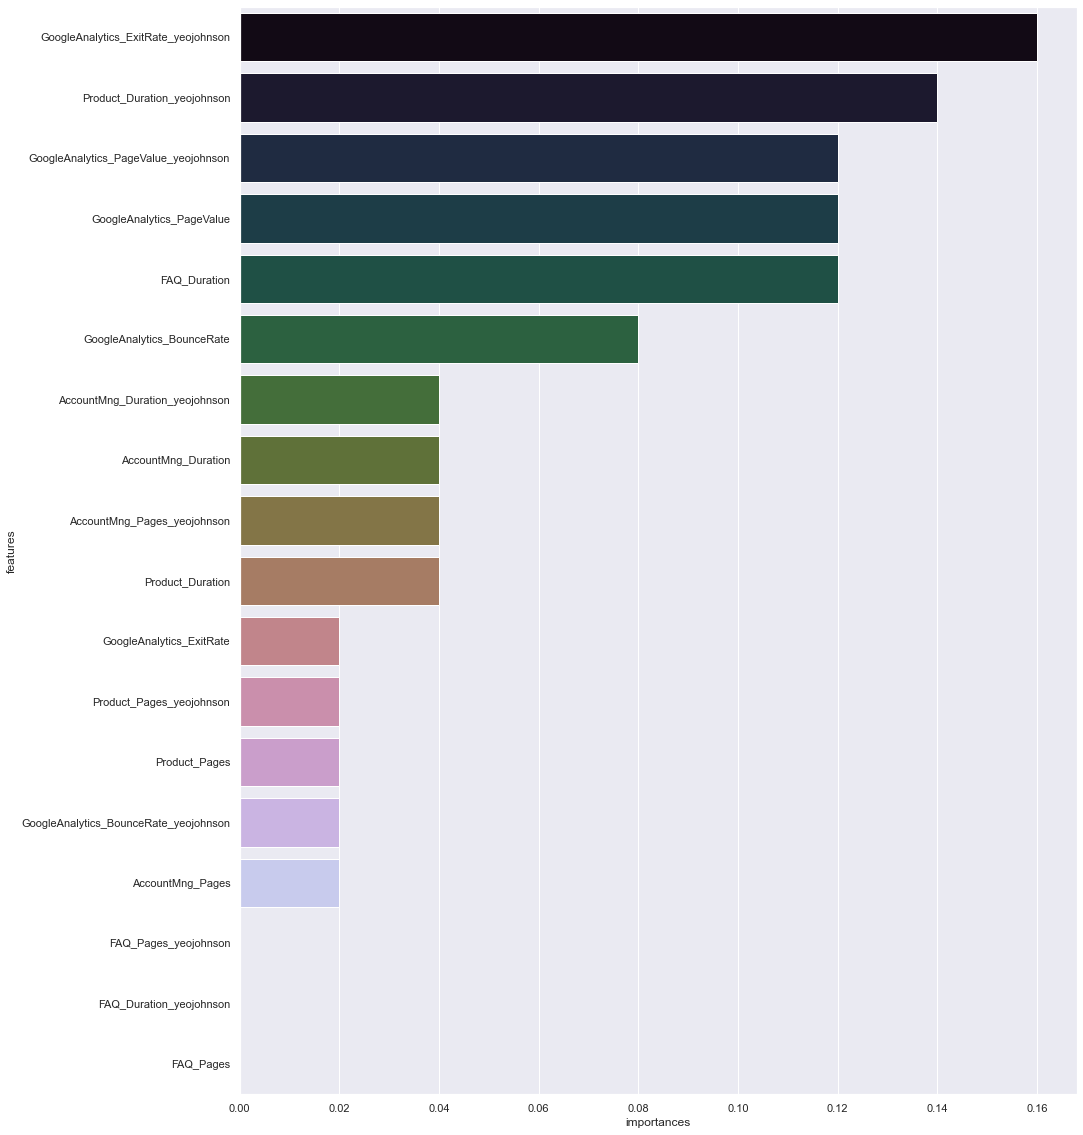

In [67]:
plt.figure(figsize=(15,20))
importances = ab.feature_importances_
features = X_train_num.columns
data_tuples = list(zip(importances, features))
data_1 = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data_1 = data_1.sort_values('importances', ascending = False)
sns.barplot(data_1['importances'], data_1['features'], palette = 'cubehelix', orient = 'h')

<a class="anchor" id="FinalFeatures">


### 10. Final Selected Features and Datasets

</a>

### Final Features Selected

In [68]:
# 1st Iteration
metric_features_baseline=["Product_Duration","Product_Pages_yeojohnson","GoogleAnalytics_ExitRate_yeojohnson","GoogleAnalytics_PageValue_yeojohnson"]
non_metric_features_baseline=["Type_of_Traffic","Month","Yearday","x0_MacOSX","x0_Windows","x2_Returner"]
features_baseline=metric_features_baseline+non_metric_features_baseline

### Final Datasets not Scaled

In [69]:
X_train_cat_baseline=X_train_cat[non_metric_features_baseline]
X_train_num_baseline=X_train_num[metric_features_baseline]

X_train=pd.concat([X_train_num_baseline,X_train_cat_baseline], axis=1)
X_train.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
424851631,2170.2867,4.744285,0.017058,0.665747,10,11,306,1.0,0.0,1.0
469670817,208.0000,2.499654,0.007570,-0.000000,2,11,315,1.0,0.0,0.0
732800945,143.2500,2.282465,0.030168,-0.000000,1,12,337,0.0,1.0,1.0


In [70]:
X_val_cat_baseline=X_val_cat[non_metric_features_baseline]
X_val_num_baseline=X_val_num[metric_features_baseline]

X_val=pd.concat([X_val_num_baseline,X_val_cat_baseline], axis=1)
X_val.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
545795498,60.4000,1.393725,0.042870,-0.0,1,6,168,1.0,0.0,1.0
315196890,2549.5345,3.991996,0.024875,-0.0,2,11,335,0.0,0.0,1.0
469020824,93.0000,1.960573,0.037852,-0.0,13,11,308,0.0,0.0,1.0


<a class="anchor" id="Re_samplingTechniques">


### 11. Re_sampling Techniques for Imbalanced Classification 

</a>

### SMOTENC

In [71]:
# O resampling é apenas feito no traindataset 
oversample = SMOTENC(random_state = 42, categorical_features= (4,len(X_train.columns)-1))
X_train_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train, y_train)

In [72]:
X_train[features_baseline].describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Product_Duration,7950.0,1158.800597,1641.949915,0.0,181.000000,596.054150,1460.745250,18171.794500
Product_Pages_yeojohnson,7950.0,3.045537,1.236295,0.0,2.155684,3.098851,3.904627,6.648011
GoogleAnalytics_ExitRate_yeojohnson,7950.0,0.021539,0.012089,-0.0,0.012229,0.019369,0.030168,0.045427
GoogleAnalytics_PageValue_yeojohnson,7950.0,0.138854,0.265198,-0.0,0.000000,-0.000000,-0.000000,0.670338
Type_of_Traffic,7950.0,3.960755,3.683438,1.0,2.000000,2.000000,4.000000,15.000000
Month,7950.0,7.617233,3.397776,2.0,5.000000,7.000000,11.000000,12.000000
Yearday,7950.0,217.058616,104.175118,32.0,130.000000,208.000000,321.000000,366.000000
x0_MacOSX,7950.0,0.205912,0.404392,0.0,0.000000,0.000000,0.000000,1.000000
x0_Windows,7950.0,0.537358,0.498634,0.0,0.000000,1.000000,1.000000,1.000000
x2_Returner,7950.0,0.852704,0.354423,0.0,1.000000,1.000000,1.000000,1.000000


In [73]:
X_train_SMOTE.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Product_Duration,13464.0,1414.302578,1819.051021,0.0,302.367780,806.715936,1771.952205,18171.794500
Product_Pages_yeojohnson,13464.0,3.284237,1.194822,0.0,2.499654,3.351207,4.067365,6.648011
GoogleAnalytics_ExitRate_yeojohnson,13464.0,0.018624,0.010859,0.0,0.010615,0.016369,0.024271,0.045427
GoogleAnalytics_PageValue_yeojohnson,13464.0,0.294002,0.312187,0.0,0.000000,0.041238,0.658375,0.670338
Type_of_Traffic,13464.0,3.529486,3.301623,1.0,2.000000,2.000000,4.000000,15.000000
Month,13464.0,7.956031,3.282463,2.0,5.000000,9.000000,11.000000,12.000000
Yearday,13464.0,229.150921,101.082056,32.0,135.000000,257.000000,322.000000,366.000000
x0_MacOSX,13464.0,0.178203,0.361144,0.0,0.000000,0.000000,0.000000,1.000000
x0_Windows,13464.0,0.562460,0.462864,0.0,0.000000,0.822676,1.000000,1.000000
x2_Returner,13464.0,0.867796,0.338725,0.0,1.000000,1.000000,1.000000,1.000000


#### MinMax

In [74]:
scaler = MinMaxScaler().fit(X_train_SMOTE)
X_train_SMOTE_scaled= scaler.transform(X_train_SMOTE)
X_train_SMOTE_scaled = pd.DataFrame(X_train_SMOTE_scaled, columns = X_train_SMOTE.columns).set_index(X_train_SMOTE.index)
X_train_SMOTE_scaled.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
0,0.119432,0.713640,0.375499,0.993152,0.642857,0.9,0.820359,1.0,0.0,1.0
1,0.011446,0.376000,0.166650,0.000000,0.071429,0.9,0.847305,1.0,0.0,0.0
2,0.007883,0.343331,0.664105,0.000000,0.000000,1.0,0.913174,0.0,1.0,1.0


In [75]:
X_val_SMOTE_scaled= scaler.transform(X_val)
X_val_SMOTE_scaled = pd.DataFrame(X_val_SMOTE_scaled, columns = X_val.columns).set_index(X_val.index)
X_val_SMOTE_scaled.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
545795498,0.003324,0.209645,0.943721,0.0,0.000000,0.4,0.407186,1.0,0.0,1.0
315196890,0.140302,0.600480,0.547581,0.0,0.071429,0.9,0.907186,0.0,0.0,1.0
469020824,0.005118,0.294911,0.833253,0.0,0.857143,0.9,0.826347,0.0,0.0,1.0


#### Robust Scaler

In [76]:
Robust_scaler = RobustScaler().fit(X_train_SMOTE)
X_train_SMOTE_robust = Robust_scaler.fit_transform(X_train_SMOTE)
X_train_SMOTE_robust = pd.DataFrame(X_train_SMOTE_robust, columns = X_train_SMOTE.columns).set_index(X_train_SMOTE.index) 
X_train_SMOTE_robust.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
0,0.927861,0.888606,0.050435,0.948560,4.0,0.333333,0.262032,1.0,-0.822676,0.0
1,-0.407405,-0.543182,-0.644305,-0.062637,0.0,0.333333,0.310160,1.0,-0.822676,-1.0
2,-0.451465,-0.681721,1.010490,-0.062637,-0.5,0.500000,0.427807,0.0,0.177324,0.0


In [77]:
X_val_SMOTE_robust =Robust_scaler.transform(X_val)
X_val_SMOTE_robust = pd.DataFrame(X_val_SMOTE_robust, columns = X_val.columns).set_index(X_val.index) 
X_val_SMOTE_robust.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
545795498,-0.507841,-1.248623,1.940637,-0.062637,-0.5,-0.500000,-0.475936,1.0,-0.822676,0.0
315196890,1.185926,0.408742,0.622871,-0.062637,0.0,0.333333,0.417112,0.0,-0.822676,0.0
469020824,-0.485658,-0.887047,1.573164,-0.062637,5.5,0.333333,0.272727,0.0,-0.822676,0.0


<a class="anchor" id="Kfold">


### 12. Repeated Stratified Kfold

</a>

In [78]:
X_train_rsk=X_train.copy()
y_train_rsk=y_train.copy()

In [79]:
rsk = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=0)

#### MinMax

In [80]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns).set_index(X_train.index)
X_train_scaled.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
424851631,0.119432,0.713640,0.375499,0.993152,0.642857,0.9,0.820359,1.0,0.0,1.0
469670817,0.011446,0.376000,0.166650,0.000000,0.071429,0.9,0.847305,1.0,0.0,0.0
732800945,0.007883,0.343331,0.664105,0.000000,0.000000,1.0,0.913174,0.0,1.0,1.0


In [81]:
X_val_scaled= scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns).set_index(X_val.index)
X_val_scaled.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
545795498,0.003324,0.209645,0.943721,0.0,0.000000,0.4,0.407186,1.0,0.0,1.0
315196890,0.140302,0.600480,0.547581,0.0,0.071429,0.9,0.907186,0.0,0.0,1.0
469020824,0.005118,0.294911,0.833253,0.0,0.857143,0.9,0.826347,0.0,0.0,1.0


#### Robust Scaler

In [82]:
Robust_scaler = RobustScaler()
X_train_robust = Robust_scaler.fit_transform(X_train)
X_train_robust = pd.DataFrame(X_train_robust, columns = X_train.columns).set_index(X_train.index) 
X_train_robust.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
424851631,1.230114,0.940816,-0.128846,0.665747,4.0,0.666667,0.513089,1.0,-1.0,0.0
469670817,-0.303228,-0.342605,-0.657715,-0.000000,0.0,0.666667,0.560209,1.0,-1.0,-1.0
732800945,-0.353824,-0.466788,0.601994,-0.000000,-0.5,0.833333,0.675393,0.0,0.0,0.0


In [83]:
X_val_robust =Robust_scaler.transform(X_val)
X_val_robust = pd.DataFrame(X_val_robust, columns = X_val.columns).set_index(X_val.index) 
X_val_robust.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
545795498,-0.418563,-0.974946,1.310066,-0.0,-0.5,-0.166667,-0.209424,1.0,-1.0,0.0
315196890,1.526460,0.510677,0.306919,-0.0,0.0,0.666667,0.664921,0.0,-1.0,0.0
469020824,-0.393089,-0.650838,1.030328,-0.0,5.5,0.666667,0.523560,0.0,-1.0,0.0


<a class="anchor" id="ModelTraining">


### 13. Model Training

</a>

**Name of the Datasets subject to use:**

**SMOTE with Repeated Stratified Kfold:**<br>
a) Not Scaled:<br>
X_train_SMOTE,y_train_SMOTE<br>
X_val,y_val<br>

b) minMax:<br>
X_train_SMOTE_scaled,y_train_SMOTE<br>
X_val_SMOTE_scaled,y_val<br>

c) Robust:<br>
X_train_SMOTE_robust,y_train_SMOTE<br>
X_val_SMOTE_robust,y_val<br>

**Train_Test_Split with Repeated Stratified Kfold on Training Dataset:**<br>
a) Not_Scaled:<br>
X_train_rsk,y_train_rsk<br>
X_val,y_val<br>

b) MinMax:<br>
X_train_scaled,y_train<br>
X_val_scaled,y_val<br>

c) Robust:<br>
X_train_robust,y_train<br>
X_val_robust,y_val<br>

<a class="anchor" id="DecisionTrees">


### 13.1 Decision Trees

</a>

### SMOTE with RSK

In [84]:
# Calculate F1 score for decision trees with SMOTE 


def calculate_F1(interval, parameter, max_depth = None):
    train_results_entropy = []
    test_results_entropy = []
  
    for value in interval:
            dt = DecisionTreeClassifier(criterion="entropy",max_depth = value,random_state=0)
            dt.fit(X_train_SMOTE, y_train_SMOTE)
            train_pred = dt.predict(X_train_SMOTE)
            f1_train = f1_score(y_train_SMOTE, train_pred)
            train_results_entropy.append(f1_train)
            val_pred = dt.predict(X_val)
            f1_val = f1_score(y_val, val_pred)
            test_results_entropy.append(f1_val)
             
  
    print('The best f1 score for train is ' + str(max(train_results_entropy)) + ' for the depth of ' + str(train_results_entropy.index(max(train_results_entropy))+1))
    print('The best f1 score for val is ' + str(max(test_results_entropy)) + ' for the depth of ' + str(test_results_entropy.index(max(test_results_entropy))+1))
        
      
    plt.plot(interval, train_results_entropy, label = "Train F1")
    plt.plot(interval, test_results_entropy, label = "Val F1")
    plt.xticks(interval)
    plt.legend()
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show()

The best f1 score for train is 0.9714538614737774 for the depth of 14
The best f1 score for val is 0.6435006435006435 for the depth of 4


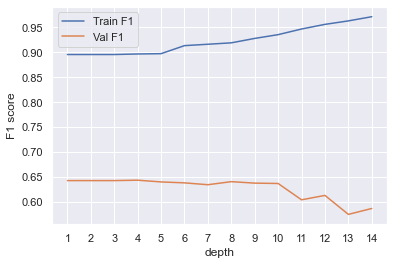

In [85]:
calculate_F1(np.arange(1,15), 'depth')

In [360]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [154]:
modelDT = DecisionTreeClassifier(criterion = 'entropy', max_depth=4,random_state=0).fit(X_train_SMOTE,y_train_SMOTE)

y_pred_train=modelDT.predict(X_train_SMOTE)
y_pred_val=modelDT.predict(X_val)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      6732
           1       0.89      0.90      0.90      6732

    accuracy                           0.90     13464
   macro avg       0.90      0.90      0.90     13464
weighted avg       0.90      0.90      0.90     13464

[[6000  732]
 [ 666 6066]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### TTS with RSK

In [88]:
# Calculate F1 scores for decision trees with repeated stratified K-fold 

def calculate_F1_rsk(interval, parameter, max_depth = None):
    rsk = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    train_results = []
    avg_train_results = []
    test_results = []
    avg_test_results = []
    
    for value in interval:
        for train_index, test_index in rsk.split(X_train_rsk,y_train_rsk):
            X_train, X_test = X_train_rsk.iloc[train_index], X_train_rsk.iloc[test_index]
            y_train, y_test = y_train_rsk.iloc[train_index], y_train_rsk.iloc[test_index]
            dt = DecisionTreeClassifier(max_depth = value, criterion="entropy", random_state=0)
            dt.fit(X_train, y_train)
            train_pred = dt.predict(X_train)
            f1_train = f1_score(y_train, train_pred)
            train_results.append(f1_train)
            val_pred = dt.predict(X_test)
            f1_val = f1_score(y_test, val_pred)
            test_results.append(f1_val)
        avg_train_results.append(round(np.mean(train_results),3))
        avg_test_results.append(round(np.mean(test_results),3))
    
    print('The best f1 score for train is ' + str(max(avg_train_results)) + ' for the depth of ' + str(avg_train_results.index(max(avg_train_results))+1))
    print('The best f1 score for test is ' + str(max(avg_test_results)) + ' for the depth of ' + str(avg_test_results.index(max(avg_test_results))+1))
        
    
    plt.plot(interval, avg_train_results, label = "Train F1")
    plt.plot(interval, avg_test_results, label = "Test F1")
    plt.xticks(interval)
    plt.legend()
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show()

The best f1 score for train is 0.709 for the depth of 14
The best f1 score for test is 0.663 for the depth of 1


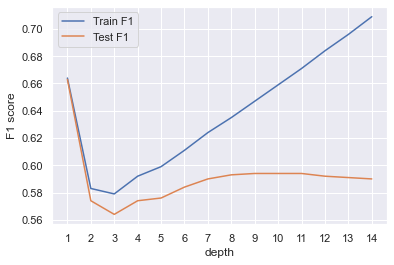

In [89]:
calculate_F1_rsk(np.arange(1,15), 'depth')

In [90]:
modelDT = DecisionTreeClassifier(criterion = 'entropy', max_depth=1,random_state=0).fit(X_train_rsk,y_train_rsk)

y_pred_train=modelDT.predict(X_train_rsk)
y_pred_val=modelDT.predict(X_val)

metrics(y_train_rsk,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      6732
           1       0.57      0.80      0.66      1218

    accuracy                           0.88      7950
   macro avg       0.76      0.85      0.79      7950
weighted avg       0.90      0.88      0.88      7950

[[5982  750]
 [ 240  978]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="LogisticRegression">


### 13.2 Logistic Regression

</a>

In [170]:
# Had to increase the max_iter to 1000 so it doesnt overkill when using robust scaling

log_model = LogisticRegression(random_state = 3, max_iter = 1000)

# Trying to figure out, by applying grid search, the influence of each hyperparameter in the model

# Algorithm to use in the optimization problem
solvers = ['newton-cg', 'lbfgs', 'liblinear']

# penalty = "elasticnet" which combines L1 and L2 penalty gives a score of 0 everytime
penalty = ['l2']

# high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty
# A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data
c_values = [100, 10, 1.0, 0.1, 0.01]

### Smote with RSK

#### MinMax

In [92]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)

# The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=rsk, scoring='f1',error_score=0)

grid_result = grid_search.fit(X_train_SMOTE_scaled, y_train_SMOTE)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.861649 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [155]:
modelLR = LogisticRegression(penalty = "l2", C = 1, solver = "liblinear").fit(X_train_SMOTE_scaled, y_train_SMOTE)

y_pred_train=modelLR.predict(X_train_SMOTE_scaled)
y_pred_val=modelLR.predict(X_val_SMOTE_scaled)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6732
           1       0.88      0.84      0.86      6732

    accuracy                           0.87     13464
   macro avg       0.87      0.87      0.86     13464
weighted avg       0.87      0.87      0.86     13464

[[5988  744]
 [1073 5659]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [94]:
# The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=rsk, scoring='f1',error_score=0)

grid_result = grid_search.fit(X_train_SMOTE_robust, y_train_SMOTE)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.861546 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [156]:
modelLR = LogisticRegression(penalty = "l2", C = 0.1, solver = "liblinear").fit(X_train_SMOTE_robust, y_train_SMOTE)

y_pred_train=modelLR.predict(X_train_SMOTE_robust)
y_pred_val=modelLR.predict(X_val_SMOTE_robust)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6732
           1       0.88      0.84      0.86      6732

    accuracy                           0.86     13464
   macro avg       0.87      0.86      0.86     13464
weighted avg       0.87      0.86      0.86     13464

[[5982  750]
 [1068 5664]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### TTS with RSK

#### MinMax

In [96]:
# The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=rsk, scoring='f1',error_score=0)

grid_result = grid_search.fit(X_train_scaled, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.634653 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [157]:
modelLR = LogisticRegression(penalty = "l2", C = 1, solver = "liblinear").fit(X_train_scaled, y_train)

y_pred_train=modelLR.predict(X_train_scaled)
y_pred_val=modelLR.predict(X_val_scaled)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6732
           1       0.66      0.62      0.64      1218

    accuracy                           0.89      7950
   macro avg       0.80      0.78      0.79      7950
weighted avg       0.89      0.89      0.89      7950

[[6343  389]
 [ 467  751]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [171]:
# The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=rsk, scoring='f1',error_score=0)

grid_result = grid_search.fit(X_train_robust, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.634301 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [99]:
modelLR = LogisticRegression(penalty = "l2", C = 10, solver = "liblinear").fit(X_train_robust, y_train)

y_pred_train=modelLR.predict(X_train_robust)
y_pred_val=modelLR.predict(X_val_robust)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6732
           1       0.66      0.61      0.64      1218

    accuracy                           0.89      7950
   macro avg       0.80      0.78      0.79      7950
weighted avg       0.89      0.89      0.89      7950

[[6346  386]
 [ 469  749]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="NaiveBayes">


### 13.3 Naive Bayes

</a>

### SMOTE with RSK

In [100]:
modelNB = GaussianNB()
modelNB=modelNB.fit(X_train_SMOTE,y_train_SMOTE)

y_pred_train=modelNB.predict(X_train_SMOTE)
y_pred_val=modelNB.predict(X_val)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6732
           1       0.86      0.85      0.86      6732

    accuracy                           0.86     13464
   macro avg       0.86      0.86      0.86     13464
weighted avg       0.86      0.86      0.86     13464

[[5800  932]
 [ 999 5733]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### TTS with RSK

In [101]:
modelNB = GaussianNB()
modelNB=modelNB.fit(X_train_rsk,y_train_rsk)

y_pred_train=modelNB.predict(X_train_rsk)
y_pred_val=modelNB.predict(X_val)

metrics(y_train_rsk,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      6732
           1       0.55      0.77      0.64      1218

    accuracy                           0.87      7950
   macro avg       0.75      0.83      0.78      7950
weighted avg       0.89      0.87      0.88      7950

[[5953  779]
 [ 280  938]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="KNN">


### 13.4 K-nearest neighbors 

</a>

### SMOTE with RSK

#### MinMAX

In [102]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_SMOTE_scaled, y_train_SMOTE)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.908006 using {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [159]:
modelKNN = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='manhattan')
modelKNN.fit(X_train_SMOTE_scaled, y_train_SMOTE)

y_pred_train=modelKNN.predict(X_train_SMOTE_scaled)
y_pred_val=modelKNN.predict(X_val_SMOTE_scaled)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6732
           1       1.00      1.00      1.00      6732

    accuracy                           1.00     13464
   macro avg       1.00      1.00      1.00     13464
weighted avg       1.00      1.00      1.00     13464

[[6732    0]
 [   0 6732]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [104]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_SMOTE_robust, y_train_SMOTE)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.910920 using {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [160]:
modelKNN = KNeighborsClassifier(n_neighbors=7,weights='distance',metric='manhattan')
modelKNN.fit(X_train_SMOTE_robust, y_train_SMOTE)

y_pred_train=modelKNN.predict(X_train_SMOTE_robust)
y_pred_val=modelKNN.predict(X_val_SMOTE_robust)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6732
           1       1.00      1.00      1.00      6732

    accuracy                           1.00     13464
   macro avg       1.00      1.00      1.00     13464
weighted avg       1.00      1.00      1.00     13464

[[6732    0]
 [   0 6732]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### TTS with RSK 

#### Minmax

In [106]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=rsk, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.646438 using {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}


In [107]:
modelKNN = KNeighborsClassifier(n_neighbors=17,weights='uniform',metric='manhattan')
modelKNN.fit(X_train_scaled, y_train)

y_pred_train=modelKNN.predict(X_train_scaled)
y_pred_val=modelKNN.predict(X_val_scaled)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6732
           1       0.73      0.65      0.68      1218

    accuracy                           0.91      7950
   macro avg       0.83      0.80      0.82      7950
weighted avg       0.91      0.91      0.91      7950

[[6441  291]
 [ 432  786]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [108]:
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=rsk, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_robust, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.549033 using {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [109]:
modelKNN = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean')
modelKNN.fit(X_train_robust, y_train)

y_pred_train=modelKNN.predict(X_train_robust)
y_pred_val=modelKNN.predict(X_val_robust)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6732
           1       1.00      1.00      1.00      1218

    accuracy                           1.00      7950
   macro avg       1.00      1.00      1.00      7950
weighted avg       1.00      1.00      1.00      7950

[[6732    0]
 [   0 1218]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="NeuralNetworks">


### 13.5 Neural Networks

</a>

### SMOTE with RSK

#### MinMax

In [110]:
begin=time.perf_counter() 

param_grid = {
     'hidden_layer_sizes': [(10,10,10)],
     'activation': ['tanh', 'relu', 'logistic'],
     'solver': ['adam', 'lbfgs'],
     'alpha': [0.0001, 0.001],
     'learning_rate': ['adaptive','invscaling']}

grid_search = RandomizedSearchCV(MLPClassifier(), param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result = grid_search.fit(X_train_SMOTE_scaled, y_train_SMOTE)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.913673 using {'solver': 'lbfgs', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (10, 10, 10), 'alpha': 0.001, 'activation': 'tanh'} timing 574.460548


In [161]:
modelNN = MLPClassifier(solver='lbfgs', learning_rate ='adaptive', hidden_layer_sizes= (10, 10, 10), alpha= 0.001, activation= 'tanh')
modelNN.fit(X_train_SMOTE_scaled, y_train_SMOTE)

y_pred_train=modelNN.predict(X_train_SMOTE_scaled)
y_pred_val=modelNN.predict(X_val_SMOTE_scaled)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      6732
           1       0.90      0.93      0.92      6732

    accuracy                           0.91     13464
   macro avg       0.91      0.91      0.91     13464
weighted avg       0.91      0.91      0.91     13464

[[6054  678]
 [ 476 6256]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [112]:
begin=time.perf_counter() 

param_grid = {
     'hidden_layer_sizes': [(10,10,10)],
     'activation': ['tanh', 'relu', 'logistic'],
     'solver': ['adam', 'lbfgs'],
     'alpha': [0.0001, 0.001],
     'learning_rate': ['adaptive','invscaling']}

grid_search = RandomizedSearchCV(MLPClassifier(), param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result = grid_search.fit(X_train_SMOTE_robust, y_train_SMOTE)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.908582 using {'solver': 'lbfgs', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (10, 10, 10), 'alpha': 0.0001, 'activation': 'tanh'} timing 503.816167


In [162]:
modelNN = MLPClassifier(solver='lbfgs', learning_rate ='invscaling', hidden_layer_sizes= (10, 10, 10), alpha= 0.0001, activation= 'tanh')
modelNN.fit(X_train_SMOTE_robust, y_train_SMOTE)

y_pred_train=modelNN.predict(X_train_SMOTE_robust)
y_pred_val=modelNN.predict(X_val_SMOTE_robust)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6732
           1       0.91      0.93      0.92      6732

    accuracy                           0.91     13464
   macro avg       0.91      0.91      0.91     13464
weighted avg       0.91      0.91      0.91     13464

[[6079  653]
 [ 496 6236]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### TTS with RSK 

#### MinMax

In [114]:
begin=time.perf_counter() 

param_grid = {
     'hidden_layer_sizes': [(10,10,10)],
     'activation': ['tanh', 'relu', 'logistic'],
     'solver': ['adam', 'lbfgs'],
     'alpha': [0.0001, 0.001],
     'learning_rate': ['adaptive','invscaling']}
    
clf = MLPClassifier()
grid_search = RandomizedSearchCV( estimator=clf, param_distributions = param_grid, n_jobs=-1, cv=rsk, scoring ='f1')
grid_result = grid_search.fit(X_train_scaled, y_train)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.651693 using {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (10, 10, 10), 'alpha': 0.001, 'activation': 'logistic'} timing 274.743087


In [163]:
modelNN = MLPClassifier(solver='adam', learning_rate ='adaptive', hidden_layer_sizes= (10, 10, 10), alpha= 0.001, activation= 'logistic')
modelNN.fit(X_train_scaled, y_train)

y_pred_train=modelNN.predict(X_train_scaled)
y_pred_val=modelNN.predict(X_val_scaled)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.93      6732
           1       0.57      0.78      0.66      1218

    accuracy                           0.88      7950
   macro avg       0.77      0.84      0.79      7950
weighted avg       0.90      0.88      0.88      7950

[[6024  708]
 [ 265  953]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [116]:
begin=time.perf_counter() 

param_grid = {
     'hidden_layer_sizes': [(10,10,10)],
     'activation': ['tanh', 'relu', 'logistic'],
     'solver': ['adam', 'lbfgs'],
     'alpha': [0.0001, 0.001],
     'learning_rate': ['adaptive','invscaling']}
    
clf = MLPClassifier()
grid_search = RandomizedSearchCV( estimator=clf, param_distributions = param_grid, n_jobs=-1, cv=rsk, scoring ='f1')
grid_result = grid_search.fit(X_train_robust, y_train)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))


Best: 0.643789 using {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (10, 10, 10), 'alpha': 0.001, 'activation': 'logistic'} timing 265.174255


In [164]:
modelNN = MLPClassifier(solver='adam', learning_rate ='adaptive', hidden_layer_sizes= (10, 10, 10), alpha= 0.001, activation= 'logistic')
modelNN.fit(X_train_robust, y_train)

y_pred_train=modelNN.predict(X_train_robust)
y_pred_val=modelNN.predict(X_val_robust)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6732
           1       0.68      0.62      0.65      1218

    accuracy                           0.90      7950
   macro avg       0.80      0.78      0.79      7950
weighted avg       0.89      0.90      0.89      7950

[[6369  363]
 [ 459  759]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="SVM">


### 13.6 Support Vector Machines(SVM)

</a>

### SMOTE with RSK 

#### MinMax

In [195]:
begin=time.perf_counter() 

param_grid = {'kernel': ['linear','poly', 'rbf', 'sigmoid'],
              'C': [0.5, 1, 50, 100]
             }

clf = SVC(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_SMOTE_scaled, y_train_SMOTE)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.914200 using {'kernel': 'rbf', 'C': 100} timing 591.959028


In [199]:
modelSVM = SVC(kernel='rbf', C=100).fit(X_train_SMOTE_scaled, y_train_SMOTE)

y_pred_train=modelSVM.predict(X_train_SMOTE_scaled)
y_pred_val=modelSVM.predict(X_val_SMOTE_scaled)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      6732
           1       0.91      0.93      0.92      6732

    accuracy                           0.92     13464
   macro avg       0.92      0.92      0.92     13464
weighted avg       0.92      0.92      0.92     13464

[[6145  587]
 [ 503 6229]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [214]:
begin=time.perf_counter() 

param_grid = {'kernel': ['poly', 'rbf', 'sigmoid'],
              'C': [0.5, 1, 50, 100]
             }

clf = SVC(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_SMOTE_robust, y_train_SMOTE)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.911678 using {'kernel': 'rbf', 'C': 100} timing 900.711136


In [215]:
modelSVM = SVC(kernel='rbf', C=100).fit(X_train_SMOTE_robust, y_train_SMOTE)

y_pred_train=modelSVM.predict(X_train_SMOTE_robust)
y_pred_val=modelSVM.predict(X_val_SMOTE_robust)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6732
           1       0.92      0.93      0.93      6732

    accuracy                           0.92     13464
   macro avg       0.92      0.92      0.92     13464
weighted avg       0.92      0.92      0.92     13464

[[6195  537]
 [ 474 6258]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

###  TTS with RSK 

#### MinMax 

In [216]:
begin=time.perf_counter() 

param_grid = {'kernel': ['rbf', 'sigmoid'],
              'C': [0.5, 1, 50, 100]
             }

clf = SVC(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_scaled, y_train)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.638980 using {'kernel': 'rbf', 'C': 100} timing 99.045448


In [201]:
modelSVM = SVC(kernel='rbf', C=100).fit(X_train_scaled, y_train)

y_pred_train=modelSVM.predict(X_train_scaled)
y_pred_val=modelSVM.predict(X_val_scaled)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6732
           1       0.76      0.62      0.69      1218

    accuracy                           0.91      7950
   macro avg       0.85      0.79      0.82      7950
weighted avg       0.91      0.91      0.91      7950

[[6492  240]
 [ 457  761]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust 

In [217]:
begin=time.perf_counter() 

param_grid = {'kernel': ['rbf', 'sigmoid'],
              'C': [0.5, 1, 50, 100]
             }

clf = SVC(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_robust, y_train)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.636513 using {'kernel': 'rbf', 'C': 100} timing 92.567313


In [361]:
modelSVM = SVC(kernel='rbf', C=100).fit(X_train_robust, y_train)

y_pred_train=modelSVM.predict(X_train_robust)
y_pred_val=modelSVM.predict(X_val_robust)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6732
           1       0.78      0.65      0.71      1218

    accuracy                           0.92      7950
   macro avg       0.86      0.81      0.83      7950
weighted avg       0.91      0.92      0.91      7950

[[6509  223]
 [ 429  789]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="RidgeClassifier">


### 13.7 Ridge Classifier

</a>

In [118]:
# This classifier first converts the target values into {-1, 1}

rc_model = RidgeClassifier(random_state=5)

# The alpha hyperparameter seems to be one of the most importants in Ridge Regression --> Regularization strenght
# Since high values of alpha specify stronger regularization, we will probably get better results with low alpha

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

### SMOTE with RSK

#### MinMax

In [119]:
grid = dict(alpha=alpha)

grid_search = GridSearchCV(estimator=rc_model, param_grid=grid, n_jobs=-1, cv=rsk, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_SMOTE_scaled, y_train_SMOTE)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.854925 using {'alpha': 0.6}


In [165]:
modelRC = RidgeClassifier(alpha = 0.6, random_state=5).fit(X_train_SMOTE_scaled, y_train_SMOTE)

y_pred_train=modelRC.predict(X_train_SMOTE_scaled)
y_pred_val=modelRC.predict(X_val_SMOTE_scaled)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      6732
           1       0.88      0.83      0.86      6732

    accuracy                           0.86     13464
   macro avg       0.86      0.86      0.86     13464
weighted avg       0.86      0.86      0.86     13464

[[5992  740]
 [1152 5580]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [121]:
grid = dict(alpha=alpha)

grid_search = GridSearchCV(estimator=rc_model, param_grid=grid, n_jobs=-1, cv=rsk, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_SMOTE_robust, y_train_SMOTE)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.854896 using {'alpha': 0.4}


In [166]:
modelRidge = RidgeClassifier(alpha = 0.4).fit(X_train_SMOTE_robust, y_train_SMOTE)

y_pred_train=modelRidge.predict(X_train_SMOTE_robust)
y_pred_val=modelRidge.predict(X_val_SMOTE_robust)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      6732
           1       0.88      0.83      0.85      6732

    accuracy                           0.86     13464
   macro avg       0.86      0.86      0.86     13464
weighted avg       0.86      0.86      0.86     13464

[[5992  740]
 [1153 5579]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### TTS with RSK

#### MinMax

In [123]:
grid_search = GridSearchCV(estimator=rc_model, param_grid=grid, n_jobs=-1, cv=rsk, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.665259 using {'alpha': 0.4}


In [124]:
modelRC = RidgeClassifier(alpha = 0.4, random_state=5).fit(X_train_scaled, y_train)

y_pred_train=modelRC.predict(X_train_scaled)
y_pred_val=modelRC.predict(X_val_scaled)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6732
           1       0.60      0.74      0.67      1218

    accuracy                           0.89      7950
   macro avg       0.78      0.83      0.80      7950
weighted avg       0.90      0.89      0.89      7950

[[6134  598]
 [ 311  907]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [125]:
grid_search = GridSearchCV(estimator=rc_model, param_grid=grid, n_jobs=-1, cv=rsk, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_robust, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.665183 using {'alpha': 0.2}


In [126]:
modelRC = RidgeClassifier(alpha = 0.2, random_state=5).fit(X_train_robust, y_train)

y_pred_train=modelRC.predict(X_train_robust)
y_pred_val=modelRC.predict(X_val_robust)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      6732
           1       0.60      0.74      0.67      1218

    accuracy                           0.89      7950
   macro avg       0.78      0.83      0.80      7950
weighted avg       0.90      0.89      0.89      7950

[[6136  596]
 [ 311  907]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="PassiveAgressiveClassifier">


### 13.8 Passive Agressive Classifier

</a>

### SMOTE with RSK

#### MinMax

In [127]:
begin=time.perf_counter() 

param_grid = {'C': [(3), (2), (1), (0.5), (0.3), (0)],
              'max_iter':[(1000),(500),(300)],
              'tol':[(1e-5), (1e-4), (1e-3), (1e-2), (1e-1), (1e-0)]}

clf = PassiveAggressiveClassifier(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_SMOTE_scaled, y_train_SMOTE)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.791702 using {'tol': 0.1, 'max_iter': 500, 'C': 0.3} timing 1.694116


In [167]:
modelPA = PassiveAggressiveClassifier(tol = 0.1, max_iter = 500, C = 0.3).fit(X_train_SMOTE_scaled, y_train_SMOTE)

y_pred_train=modelPA.predict(X_train_SMOTE_scaled)
y_pred_val=modelPA.predict(X_val_SMOTE_scaled)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      6732
           1       0.88      0.86      0.87      6732

    accuracy                           0.87     13464
   macro avg       0.87      0.87      0.87     13464
weighted avg       0.87      0.87      0.87     13464

[[5919  813]
 [ 914 5818]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [129]:
begin=time.perf_counter() 

param_grid = {'C': [(3), (2), (1), (0.5), (0.3), (0)],
              'max_iter':[(1000),(500),(300)],
              'tol':[(1e-5), (1e-4), (1e-3), (1e-2), (1e-1), (1e-0)]}

clf = PassiveAggressiveClassifier(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_SMOTE_robust, y_train_SMOTE)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.810419 using {'tol': 0.0001, 'max_iter': 500, 'C': 0.3} timing 1.817384


In [168]:
modelPA = PassiveAggressiveClassifier(tol= 0.0001, max_iter= 500, C=0.3,random_state=0).fit(X_train_SMOTE_robust,y_train_SMOTE)

y_pred_train=modelPA.predict(X_train_SMOTE_robust)
y_pred_val=modelPA.predict(X_val_SMOTE_robust)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6732
           1       0.88      0.85      0.86      6732

    accuracy                           0.87     13464
   macro avg       0.87      0.87      0.87     13464
weighted avg       0.87      0.87      0.87     13464

[[5924  808]
 [ 989 5743]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### TTS with RSK

#### MinMax

In [131]:
begin=time.perf_counter() 

param_grid = {'C': [(3), (2), (1), (0.5), (0.3), (0)],
              'max_iter':[(1000),(500),(300)],
              'tol':[(1e-5), (1e-4), (1e-3), (1e-2), (1e-1), (1e-0)]}

clf = PassiveAggressiveClassifier(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_scaled, y_train)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.522403 using {'tol': 0.1, 'max_iter': 1000, 'C': 0.3} timing 1.141761


In [169]:
modelPA = PassiveAggressiveClassifier(tol = 0.1, max_iter = 1000, C = 0.3).fit(X_train_scaled, y_train)

y_pred_train=modelPA.predict(X_train_scaled)
y_pred_val=modelPA.predict(X_val_scaled)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.38      0.55      6732
           1       0.23      1.00      0.37      1218

    accuracy                           0.47      7950
   macro avg       0.61      0.69      0.46      7950
weighted avg       0.88      0.47      0.52      7950

[[2555 4177]
 [   3 1215]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

#### Robust

In [133]:
begin=time.perf_counter() 

param_grid = {'C': [(3), (2), (1), (0.5), (0.3), (0)],
              'max_iter':[(1000),(500),(300)],
              'tol':[(1e-5), (1e-4), (1e-3), (1e-2), (1e-1), (1e-0)]}

clf = PassiveAggressiveClassifier(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_robust, y_train)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.529121 using {'tol': 1e-05, 'max_iter': 500, 'C': 0.3} timing 1.077194


In [134]:
modelPA = PassiveAggressiveClassifier(tol= 0.0001, max_iter= 300, C=0.3,random_state=0).fit(X_train_robust,y_train)

y_pred_train=modelPA.predict(X_train_robust)
y_pred_val=modelPA.predict(X_val_robust)

metrics(y_train,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6732
           1       0.63      0.55      0.59      1218

    accuracy                           0.88      7950
   macro avg       0.77      0.75      0.76      7950
weighted avg       0.88      0.88      0.88      7950

[[6337  395]
 [ 547  671]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="EnsembleMethods">


### 13.9 Ensemble Methods

</a>

<a class="anchor" id="Adaboost">


### 13.9.1 Adaboost

</a>

### SMOTE with RSK

In [135]:
begin=time.perf_counter() 

param_grid = {'n_estimators': range(1,1000), 
              'learning_rate': list(np.linspace(0.1, 0.9, 9, endpoint=True))}

clf = AdaBoostClassifier(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_SMOTE, y_train_SMOTE)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.918110 using {'n_estimators': 900, 'learning_rate': 0.4} timing 336.626818


In [173]:
modelADA = AdaBoostClassifier(n_estimators= 900, learning_rate= 0.4,random_state=0).fit(X_train_SMOTE,y_train_SMOTE)

y_pred_train=modelADA.predict(X_train_SMOTE)
y_pred_val=modelADA.predict(X_val)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6732
           1       0.91      0.93      0.92      6732

    accuracy                           0.92     13464
   macro avg       0.92      0.92      0.92     13464
weighted avg       0.92      0.92      0.92     13464

[[6150  582]
 [ 484 6248]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### TTS with RSK 

In [137]:
begin=time.perf_counter() 

param_grid = {'n_estimators': range(10,1000), 
              'learning_rate': list(np.linspace(0.1, 0.9, 9, endpoint=True))}

clf = AdaBoostClassifier(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_rsk, y_train_rsk)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.601079 using {'n_estimators': 957, 'learning_rate': 0.1} timing 344.364636


In [174]:
modelADA = AdaBoostClassifier(n_estimators= 957, learning_rate= 0.1,random_state=0).fit(X_train_rsk,y_train_rsk)

y_pred_train=modelADA.predict(X_train_rsk)
y_pred_val=modelADA.predict(X_val)

metrics(y_train_rsk,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6732
           1       0.69      0.56      0.62      1218

    accuracy                           0.89      7950
   macro avg       0.81      0.76      0.78      7950
weighted avg       0.89      0.89      0.89      7950

[[6423  309]
 [ 530  688]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="GradientBoost">


### 13.9.2 Gradient Boost

</a>

### SMOTE with RSK

In [139]:
begin=time.perf_counter() 

param_grid = {'n_estimators': range(10,1000), 
              'learning_rate': list(np.linspace(0.1, 0.9, 9, endpoint=True)),
              'loss': ['deviance', 'exponential'],
              'min_samples_split': [1,2,3,4,5],
              'max_features': ['sqrt', 'log2'],
             }

clf = GradientBoostingClassifier(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_SMOTE, y_train_SMOTE)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.928356 using {'n_estimators': 755, 'min_samples_split': 5, 'max_features': 'sqrt', 'loss': 'deviance', 'learning_rate': 0.1} timing 203.120102


In [175]:
modelGB = GradientBoostingClassifier(n_estimators = 755, min_samples_split = 5, max_features = 'sqrt', loss = 'deviance', learning_rate = 0.1)
modelGB.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_train=modelGB.predict(X_train_SMOTE)
y_pred_val=modelGB.predict(X_val)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6732
           1       0.95      0.96      0.96      6732

    accuracy                           0.96     13464
   macro avg       0.96      0.96      0.96     13464
weighted avg       0.96      0.96      0.96     13464

[[6415  317]
 [ 272 6460]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### TTS with RSK

In [141]:
begin=time.perf_counter() 

param_grid = {'n_estimators': range(10,1000), 
              'learning_rate': list(np.linspace(0.1, 0.9, 9, endpoint=True)),
              'loss': ['deviance', 'exponential'],
              'min_samples_split': [1,2,3,4,5],
              'max_features': ['sqrt', 'log2'],
             }

clf = GradientBoostingClassifier(random_state=0)
grid_search = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, n_jobs=-1,cv=rsk,scoring ='f1')
grid_result=grid_search.fit(X_train_rsk, y_train_rsk)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.647728 using {'n_estimators': 111, 'min_samples_split': 2, 'max_features': 'sqrt', 'loss': 'deviance', 'learning_rate': 0.2} timing 73.963653


In [205]:
modelGB = GradientBoostingClassifier(n_estimators = 111, min_samples_split = 2, max_features = 'sqrt', loss = 'deviance', learning_rate = 0.2,random_state=0)
modelGB.fit(X_train_rsk, y_train_rsk)

y_pred_train=modelGB.predict(X_train_rsk)
y_pred_val=modelGB.predict(X_val)

metrics(y_train_rsk,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6732
           1       0.81      0.69      0.74      1218

    accuracy                           0.93      7950
   macro avg       0.88      0.83      0.85      7950
weighted avg       0.92      0.93      0.92      7950

[[6529  203]
 [ 376  842]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="RandomForest1">


### 13.9.3 Random Forest

</a>

### SMOTE with RSK

In [143]:
begin=time.perf_counter() 

param_grid = {
     'n_estimators': range(100,200),
     'max_features': ['sqrt', 'log2'],
     'max_depth': [2,4,6,8,10]}
    
clf = RandomForestClassifier()
grid_search = RandomizedSearchCV( estimator=clf, param_distributions = param_grid, n_jobs=-1, cv=rsk, scoring ='f1')
grid_result = grid_search.fit(X_train_SMOTE, y_train_SMOTE)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.923349 using {'n_estimators': 133, 'max_features': 'log2', 'max_depth': 10} timing 86.050737


In [177]:
modelRF = RandomForestClassifier(n_estimators=133, max_features='log2', max_depth=10)
modelRF=modelRF.fit(X_train_SMOTE,y_train_SMOTE)

y_pred_train=modelRF.predict(X_train_SMOTE)
y_pred_val=modelRF.predict(X_val)

metrics(y_train_SMOTE,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6732
           1       0.93      0.95      0.94      6732

    accuracy                           0.94     13464
   macro avg       0.94      0.94      0.94     13464
weighted avg       0.94      0.94      0.94     13464

[[6263  469]
 [ 325 6407]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

### TTS with RSK

**Calculate the max_features and number of estimators**

In [145]:
ensemble_clfs = {
    "RF, max_features='sqrt'": RandomForestClassifier(oob_score=True, max_features="sqrt", random_state=0),
    "RF, max_features='log2'": RandomForestClassifier(oob_score=True, max_features='log2', random_state=0),
    "RF, max_features=None": RandomForestClassifier(oob_score=True, max_features=None,  random_state=0),
}

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 200

In [146]:
error_rate = dict((label, []) for label in ensemble_clfs)
for label, clf in ensemble_clfs.items():
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_rsk, y_train_rsk)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

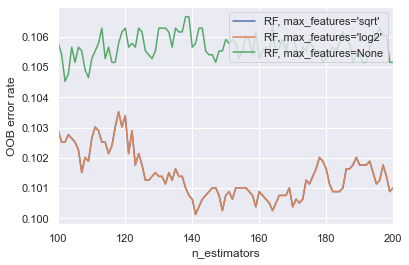

In [147]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

**Calculate the tree depth**

In [148]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = rsk)
    return n_scores

In [149]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_train_rsk, y_train_rsk)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

>4 0.600 (0.043)
>6 0.642 (0.038)
>8 0.647 (0.039)
>10 0.641 (0.034)


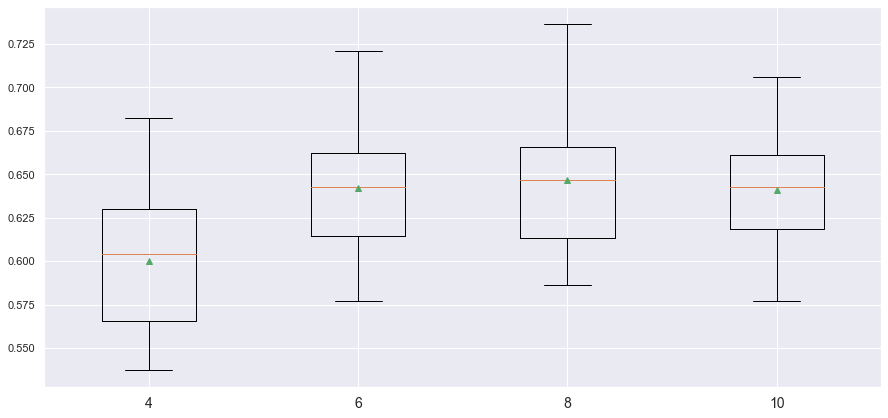

In [178]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(n_estimators=142,max_features='log2',max_depth = value, random_state = 15)      
    return models

models = get_models([4,6,8,10])
return_results(models)

In [180]:
modelRF = RandomForestClassifier(n_estimators=142,max_features='log2',max_depth = 8, random_state = 15).fit(X_train_rsk,y_train_rsk)

y_pred_train=modelRF.predict(X_train_rsk)
y_pred_val=modelRF.predict(X_val)

metrics(y_train_rsk,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6732
           1       0.84      0.67      0.75      1218

    accuracy                           0.93      7950
   macro avg       0.89      0.83      0.86      7950
weighted avg       0.93      0.93      0.93      7950

[[6581  151]
 [ 396  822]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [151]:
begin=time.perf_counter() 

param_grid = {
     'n_estimators': range(100,200),
     'max_features': ['sqrt', 'log2'],
     'max_depth': [2,4,6,8,10]}
    
clf = RandomForestClassifier()
grid_search = RandomizedSearchCV( estimator=clf, param_distributions = param_grid, n_jobs=-1, cv=rsk, scoring ='f1')
grid_result = grid_search.fit(X_train_rsk, y_train_rsk)

end=time.perf_counter()
timer=end-begin
# summarize results
print("Best: %f using %s timing %f" % (grid_result.best_score_, grid_result.best_params_,timer))

Best: 0.645460 using {'n_estimators': 140, 'max_features': 'log2', 'max_depth': 10} timing 59.232490


In [179]:
modelRF = RandomForestClassifier(n_estimators=140,max_features='log2',max_depth = 10, random_state = 15).fit(X_train_rsk,y_train_rsk)

y_pred_train=modelRF.predict(X_train_rsk)
y_pred_val=modelRF.predict(X_val)

metrics(y_train_rsk,y_pred_train , y_val, y_pred_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6732
           1       0.92      0.74      0.82      1218

    accuracy                           0.95      7950
   macro avg       0.94      0.87      0.90      7950
weighted avg       0.95      0.95      0.95      7950

[[6648   84]
 [ 313  905]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [211]:
print(round(f1_score(y_val,RandomForestClassifier(n_estimators=142,max_features='log2',max_depth = 8, random_state = 15).fit(X_train_rsk,y_train_rsk).predict(X_val)),4))
print(round(f1_score(y_val,RandomForestClassifier(n_estimators=140,max_features='log2',max_depth = 10, random_state = 15).fit(X_train_rsk,y_train_rsk).predict(X_val)),4))

0.6707
0.6719


<a class="anchor" id="Stacking">


### 13.9.4 Stacking

</a>

In [206]:
estimators = [('RF', RandomForestClassifier(n_estimators=140,max_features='log2',max_depth = 10, random_state = 15)),
              ('GB', GradientBoostingClassifier(n_estimators = 111, min_samples_split = 2, max_features = 'sqrt', loss = 'deviance', learning_rate = 0.2,random_state=0))]

estimators2= [('RF', RandomForestClassifier(n_estimators=140,max_features='log2',max_depth = 10, random_state = 15)),
              ('SVC', SVC(kernel='rbf', C=100,random_state=0))]

estimators3=[('SVC', SVC(kernel='rbf', C=100,random_state=0)),
              ('GB', GradientBoostingClassifier(n_estimators = 111, min_samples_split = 2, max_features = 'sqrt', loss = 'deviance', learning_rate = 0.2,random_state=0))]

estimators4=[('RF', RandomForestClassifier(n_estimators=140,max_features='log2',max_depth = 10, random_state = 15)),
              ('GB', GradientBoostingClassifier(n_estimators = 111, min_samples_split = 2, max_features = 'sqrt', loss = 'deviance', learning_rate = 0.2,random_state=0)),
            ('SVC',SVC(kernel='rbf', C=100,random_state=0))]

In [207]:
st=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train_rsk, y_train_rsk)
st2=StackingClassifier(estimators=estimators2, final_estimator=LogisticRegression()).fit(X_train_scaled, y_train)
st3=StackingClassifier(estimators=estimators3, final_estimator=LogisticRegression()).fit(X_train_scaled, y_train)
st4=StackingClassifier(estimators=estimators4, final_estimator=LogisticRegression()).fit(X_train_scaled, y_train)

In [209]:
print(round(f1_score(y_val,st.predict(X_val)),4))
print(round(f1_score(y_val,st2.predict(X_val_scaled)),4))
print(round(f1_score(y_val,st3.predict(X_val_scaled)),4))
print(round(f1_score(y_val,st4.predict(X_val_scaled)),4))

0.6716
0.6667
0.6676
0.6756


<a class="anchor" id="ModelsComparison">


### 14. Models Comparison 

</a>

 <a class="anchor" id="Accuracies">


### 14.1 F1 Scores  

</a>

In [265]:
modelDT = DecisionTreeClassifier(criterion = 'entropy', max_depth=1,random_state=0).fit(X_train_rsk,y_train_rsk)
modelLR = LogisticRegression(penalty = "l2", C = 1, solver = "liblinear").fit(X_train_scaled, y_train)
modelNB = GaussianNB().fit(X_train_rsk,y_train_rsk)
modelKNN = KNeighborsClassifier(n_neighbors=17,weights='uniform',metric='manhattan').fit(X_train_scaled, y_train)
modelNN = MLPClassifier(solver='lbfgs', learning_rate ='invscaling', hidden_layer_sizes= (10, 10, 10), alpha= 0.0001, activation= 'tanh').fit(X_train_SMOTE_robust, y_train_SMOTE)
modelSVM = SVC(kernel='rbf', C=100,probability=True).fit(X_train_scaled, y_train)
modelRC = RidgeClassifier(alpha = 0.4, random_state=5,).fit(X_train_scaled, y_train)
modelPA = PassiveAggressiveClassifier(tol = 0.1, max_iter = 500, C = 0.3).fit(X_train_SMOTE_scaled, y_train_SMOTE)
modelADA = AdaBoostClassifier(n_estimators= 957, learning_rate= 0.1,random_state=0).fit(X_train_rsk,y_train_rsk)
modelGB = GradientBoostingClassifier(n_estimators = 111, min_samples_split = 2, max_features = 'sqrt', loss = 'deviance', learning_rate = 0.2,random_state=0).fit(X_train_rsk, y_train_rsk)
modelRF = RandomForestClassifier(n_estimators=142,max_features='log2',max_depth = 8, random_state = 15).fit(X_train_rsk,y_train_rsk)
modelst=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train_rsk, y_train_rsk)
modelst4=StackingClassifier(estimators=estimators4, final_estimator=LogisticRegression()).fit(X_train_scaled, y_train)

In [272]:
DT = modelDT.predict(X_val)
fpr1, tpr1, _ = roc_curve(y_val,  DT)
#yproba = modelDT.predict_proba(X_val)[::,1]
#auc1 = roc_auc_score(y_val, yproba)

LR = modelLR.predict(X_val_scaled)
fpr2, tpr2, _ = roc_curve(y_val, LR)
#yproba = modelLR.predict_proba(X_val_scaled)[::,1]
#auc2 = roc_auc_score(y_val, yproba)

NB = modelNB.predict(X_val)
fpr3, tpr3, _ = roc_curve(y_val, NB)
#yproba = modelNB.predict_proba(X_val)[::,1]
#auc3 = roc_auc_score(y_val, yproba)

KNN = modelKNN.predict(X_val_scaled)
fpr4, tpr4, _ = roc_curve(y_val, KNN)
#yproba = modelKNN.predict_proba(X_val_scaled)[::,1]
#auc4 = roc_auc_score(y_val, yproba)

NN = modelNN.predict(X_val_SMOTE_robust)
fpr5, tpr5, _ = roc_curve(y_val, NN)
#yproba = modelNN.predict_proba(X_val_SMOTE_robust)[::,1]
#auc5 = roc_auc_score(y_val, yproba)

SVM = modelSVM.predict(X_val_scaled)
fpr6, tpr6, _ = roc_curve(y_val, SVM)
yproba = modelSVM.predict_proba(X_val_scaled)[::,1]
auc6 = roc_auc_score(y_val, yproba)

RC = modelRC.predict(X_val_scaled)
fpr7, tpr7, _ = roc_curve(y_val, RC)
#yproba = modelRC.predict_proba(X_val_scaled)[::,1]
#auc7 = roc_auc_score(y_val, yproba)

PA = modelPA.predict(X_val_SMOTE_scaled)
fpr8, tpr8, _ = roc_curve(y_val, PA)
#yproba = modelPA.predict_proba(X_val_SMOTE_scaled)[::,1]
#auc8 = roc_auc_score(y_val, yproba)

ADA = modelADA.predict(X_val)
fpr9, tpr9, _ = roc_curve(y_val, ADA)
yproba = modelADA.predict_proba(X_val)[::,1]
auc9 = roc_auc_score(y_val, yproba)

GB = modelGB.predict(X_val)
fpr10, tpr10, _ = roc_curve(y_val, GB)
yproba = modelGB.predict_proba(X_val)[::,1]
auc10 = roc_auc_score(y_val, yproba)

RF = modelRF.predict(X_val)
fpr11, tpr11, _ = roc_curve(y_val, RF)
yproba = modelRF.predict_proba(X_val)[::,1]
auc11 = roc_auc_score(y_val, yproba)

st = modelst.predict(X_val)
fpr12, tpr12, _ = roc_curve(y_val, st)
yproba = modelst.predict_proba(X_val)[::,1]
auc12 = roc_auc_score(y_val, yproba)

st4 = modelst4.predict(X_val_scaled)
fpr13, tpr13, _ = roc_curve(y_val, st4)
yproba = modelst4.predict_proba(X_val_scaled)[::,1]
auc13 = roc_auc_score(y_val, yproba)

In [267]:
accuracies = [f1_score(y_val, DT), 
              f1_score(y_val, LR), 
              f1_score(y_val, NB),
              f1_score(y_val, KNN), 
              f1_score(y_val, NN), 
              f1_score(y_val, SVM),
              f1_score(y_val, RC), 
              f1_score(y_val, PA), 
              f1_score(y_val, ADA),
              f1_score(y_val, GB),
              f1_score(y_val, RF),
              f1_score(y_val, st),
              f1_score(y_val, st4)]

In [365]:
f1_score(y_val, st4)

0.6755555555555556

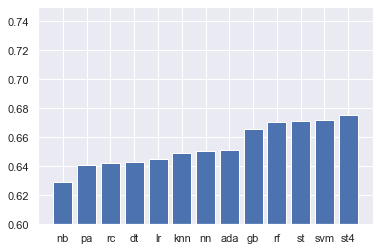

In [268]:
models = ['dt','lr','nb','knn','nn','svm','rc','pa','ada','gb','rf','st','st4']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.ylim(0.6,0.75)
plt.show()

 <a class="anchor" id="ROCCurve">


### 14.2 ROC Curve  

</a>

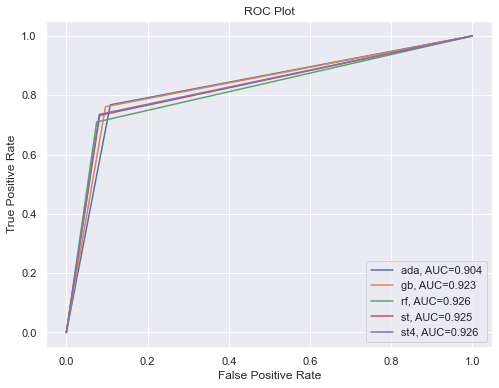

In [273]:
#define metrics
fig = plt.figure(figsize=(8,6))


#create ROC curve
plt.plot(fpr9,tpr9, label = "{}, AUC={:.3f}".format("ada", auc9))
plt.plot(fpr10,tpr10, label = "{}, AUC={:.3f}".format("gb", auc10))
plt.plot(fpr11,tpr11, label = "{}, AUC={:.3f}".format("rf", auc11))
plt.plot(fpr12,tpr12, label = "{}, AUC={:.3f}".format("st", auc12))
plt.plot(fpr13,tpr13, label = "{}, AUC={:.3f}".format("st4", auc13))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Plot")
plt.legend()
plt.show()

 <a class="anchor" id="FinalModel">


### 15. Final Model Submission 

</a>

### Test Preparation Dataset

In [275]:
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(test[["OS", "Country", "Type_of_Visitor"]])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=test.index, columns=ohc_feat_names) 
ohc_df.head(3)

,x0_Chrome OS,x0_Fedora,x0_MacOSX,x0_Other,x0_Ubuntu,x0_Windows,x0_iOS,x1_France,x1_Germany,x1_Italy,x1_Other,x1_Portugal,x1_Spain,x1_Switzerland,x1_United Kingdom,x2_Other,x2_Returner
Access_ID,,,,,,,,,,,,,,,,,
798519314,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798663101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
798663221,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [299]:
test['Month'] = test['Date'].apply(lambda x: month_to_number(x))
test['Day'] = test['Date'].apply(lambda x: x.split('-')[0])
test['Weekday'] = test['Date'].apply(lambda x: day_to_weekday(x))
test['Yearday'] = test['Date'].apply(lambda x: day_of_year(x)) 
test = test.drop('Date', axis = 'columns')

In [300]:
test_n = pd.concat([test.drop(columns = ["OS", "Country", "Type_of_Visitor"]), ohc_df], axis = 1)
test_n.head(3)

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,...,x1_France,x1_Germany,x1_Italy,x1_Other,x1_Portugal,x1_Spain,x1_Switzerland,x1_United Kingdom,x2_Other,x2_Returner
Access_ID,,,,,,,,,,,,,,,,,,,,,
798519314,0,0.0,0,0.0,86,5332.5478,0.0139,0.0654,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
798663101,2,37.5,0,0.0,55,1420.4725,0.0012,0.0058,0.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
798663221,0,0.0,0,0.0,36,788.5000,0.0000,0.0250,0.0,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [301]:
test=test_n.copy()

In [303]:
# Modify the AccountMng, FAQ and Product duration variables when its value is zero with the respective pages equals or above 2

for i in range(2,27):
    index1=test[(test.AccountMng_Pages==i) & (test.AccountMng_Duration==0)].index
    AccountMng_Duration_median=test[test.AccountMng_Pages==i]["AccountMng_Duration"].median() 
    test.loc[index1,"AccountMng_Duration"]=AccountMng_Duration_median

for i in range(2,27):
    index2=test[(test.FAQ_Pages==i) & (test.FAQ_Duration==0)].index
    FAQ_Duration_median=test[test.FAQ_Pages==i]["FAQ_Duration"].median() 
    test.loc[index2,"FAQ_Duration"]=FAQ_Duration_median

for i in range(2,27):
    index3=test[(test.Product_Pages==i) & (test.Product_Duration==0)].index
    Product_Duration_median=test[test.Product_Pages==i]["Product_Duration"].median() 
    test.loc[index3,"Product_Duration"]=Product_Duration_median

In [312]:
metric_test=test[metric_features].columns
non_metric_test=test.drop(columns=metric_test).columns
test_num = test[metric_features]
test_cat = test[non_metric_test]

In [314]:
metric_features_yeojohnson=[]

for i in metric_features:
    metric_features_yeojohnson.append(i + str("_yeojohnson"))

auxiliar=dict(zip(metric_features,metric_features_yeojohnson)) 

for j,s in auxiliar.items():
    test_num[s], param =stats.yeojohnson(test_num[j])
    test_num[s], param =stats.yeojohnson(test_num[j])

test_num.head()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,AccountMng_Pages_yeojohnson,AccountMng_Duration_yeojohnson,FAQ_Pages_yeojohnson,FAQ_Duration_yeojohnson,Product_Pages_yeojohnson,Product_Duration_yeojohnson,GoogleAnalytics_BounceRate_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson
Access_ID,,,,,,,,,,,,,,,,,,
798519314,0,0.00,0,0.0,86,5332.5478,0.0139,0.0654,0.0000,-0.000000,-0.000000,-0.000000,-0.0,4.517221,25.113986,0.010783,0.034434,-0.000000
798663101,2,37.50,0,0.0,55,1420.4725,0.0012,0.0058,0.0000,0.839409,3.080728,-0.000000,-0.0,4.067009,17.690615,0.001173,0.005435,-0.000000
798663221,0,0.00,0,0.0,36,788.5000,0.0000,0.0250,0.0000,-0.000000,-0.000000,-0.000000,-0.0,3.644415,15.015755,-0.000000,0.019118,-0.000000
798760918,0,0.00,0,0.0,2,689.0000,0.0000,0.1000,0.0000,-0.000000,-0.000000,-0.000000,-0.0,1.101700,14.449666,-0.000000,0.040268,-0.000000
798856982,12,225.25,1,0.0,129,3367.0413,0.0014,0.0185,1.0353,1.424928,4.229000,0.237187,-0.0,4.928534,22.288256,0.001363,0.015125,0.434702


In [315]:
test_cat_baseline=test_cat[non_metric_features_baseline]
test_num_baseline=test_num[metric_features_baseline]

test=pd.concat([test_num_baseline,test_cat_baseline], axis=1)
test.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
798519314,5332.5478,4.517221,0.034434,-0.0,1,8,237,0.0,1.0,1.0
798663101,1420.4725,4.067009,0.005435,-0.0,4,5,146,0.0,0.0,1.0
798663221,788.5000,3.644415,0.019118,-0.0,3,11,307,0.0,1.0,1.0


### Test Scaled

#### MinMax

In [316]:
scaler = MinMaxScaler().fit(test)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns = test.columns).set_index(test.index)
test_scaled.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
798519314,0.288182,0.707571,0.761553,0.0,0.000000,0.6,0.613772,0.0,1.0,1.0
798663101,0.076765,0.637050,0.120205,0.0,0.214286,0.3,0.341317,0.0,0.0,1.0
798663221,0.042612,0.570856,0.422806,0.0,0.142857,0.9,0.823353,0.0,1.0,1.0


### Train All Data

In [324]:
inputs_num = inputs[metric_features]
inputs_cat = inputs[non_metric_test]

In [325]:
metric_features_yeojohnson=[]

for i in metric_features:
    metric_features_yeojohnson.append(i + str("_yeojohnson"))

auxiliar=dict(zip(metric_features,metric_features_yeojohnson)) 

for j,s in auxiliar.items():
    inputs_num[s], param =stats.yeojohnson(inputs_num[j])
    inputs_num[s], param =stats.yeojohnson(inputs_num[j])

inputs_num.head()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,AccountMng_Pages_yeojohnson,AccountMng_Duration_yeojohnson,FAQ_Pages_yeojohnson,FAQ_Duration_yeojohnson,Product_Pages_yeojohnson,Product_Duration_yeojohnson,GoogleAnalytics_BounceRate_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson
Access_ID,,,,,,,,,,,,,,,,,,
102863333,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,-0.0,-0.0,-0.00000,-0.000000,1.407790,6.847305,-0.000000,0.034742,-0.000000
103117814,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,-0.0,-0.0,-0.00000,-0.000000,3.292539,14.594741,0.014868,0.028322,-0.000000
103201891,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,-0.0,-0.0,-0.00000,-0.000000,2.251550,7.868862,0.016254,0.032617,-0.000000
103226087,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,-0.0,-0.0,-0.00000,-0.000000,2.362292,14.107393,-0.000000,0.019119,0.694623
103234445,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,-0.0,-0.0,0.26072,0.917292,3.759193,18.558156,-0.000000,0.008387,0.681027


In [333]:
inputs_cat_baseline=inputs_cat[non_metric_features_baseline]
inputs_num_baseline=inputs_num[metric_features_baseline]

inputs_=pd.concat([inputs_num_baseline,inputs_cat_baseline], axis=1)
inputs_.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
102863333,64.0,1.407790,0.034742,-0.0,1,3,81,1.0,0.0,1.0
103117814,684.5,3.292539,0.028322,-0.0,6,5,141,0.0,1.0,1.0
103201891,95.0,2.251550,0.032617,-0.0,1,12,339,0.0,1.0,1.0


In [334]:
scaler = MinMaxScaler().fit(inputs_)
inputs_scaled = scaler.transform(inputs_)
inputs_scaled = pd.DataFrame(inputs_scaled, columns = inputs_.columns).set_index(inputs_.index)
inputs_scaled.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner
Access_ID,,,,,,,,,,
102863333,0.001000,0.199406,0.768232,0.0,0.000000,0.1,0.146707,1.0,0.0,1.0
103117814,0.010700,0.466372,0.626260,0.0,0.357143,0.3,0.326347,0.0,1.0,1.0
103201891,0.001485,0.318921,0.721225,0.0,0.000000,1.0,0.919162,0.0,1.0,1.0


### Running the Chosen Algorithm

In [320]:
#Model Stacking 4 - model
model=StackingClassifier(estimators=estimators4, final_estimator=LogisticRegression()).fit(X_train_scaled, y_train)
test_scaled['Buy'] = model.predict(test_scaled)
test_scaled.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner,Buy
Access_ID,,,,,,,,,,,
798519314,0.288182,0.707571,0.761553,0.0,0.000000,0.6,0.613772,0.0,1.0,1.0,0
798663101,0.076765,0.637050,0.120205,0.0,0.214286,0.3,0.341317,0.0,0.0,1.0,0
798663221,0.042612,0.570856,0.422806,0.0,0.142857,0.9,0.823353,0.0,1.0,1.0,0


In [352]:
#Model Stacking 4 - model1
model1=StackingClassifier(estimators=estimators4, final_estimator=LogisticRegression()).fit(inputs_scaled, target)
test_scaled['Buy'] = model.predict(test_scaled)
test_scaled.head(3)

,Product_Duration,Product_Pages_yeojohnson,GoogleAnalytics_ExitRate_yeojohnson,GoogleAnalytics_PageValue_yeojohnson,Type_of_Traffic,Month,Yearday,x0_MacOSX,x0_Windows,x2_Returner,Buy
Access_ID,,,,,,,,,,,
798519314,0.288182,0.707571,0.761553,0.0,0.000000,0.6,0.613772,0.0,1.0,1.0,0
798663101,0.076765,0.637050,0.120205,0.0,0.214286,0.3,0.341317,0.0,0.0,1.0,0
798663221,0.042612,0.570856,0.422806,0.0,0.142857,0.9,0.823353,0.0,1.0,1.0,0


In [322]:
Kaggle_predictions= test_scaled['Buy'].to_csv('Kaggle_Predictions.csv', index = True)
print('\nCSV String:\n', Kaggle_predictions)


CSV String:
 None


In [353]:
Kaggle_predictions1= test_scaled['Buy'].to_csv('Kaggle_Predictions1.csv', index = True)
print('\nCSV String:\n', Kaggle_predictions1)


CSV String:
 None


In [350]:
# To rerun the model 
test_scaled.drop(columns=["Buy"],inplace=True)